A text-to-video diffusion transformer model that generates a video
dataset

# Installing environment

##  Importing modules and libraries

In [ ]:
from IPython.display import HTML # to display videos
import base64 # to encode videos as base64
from base64 import b64encode # to encode videos as base64
import os # to interact with the operating system
import subprocess # to run commands
import time # to measure execution time
import csv # to save comments
import uuid # to generate unique ids
import cv2 # to split videos
from PIL import Image # to display videos
import pandas as pd # to display comments
import numpy as np # to use Numerical Python
from io import BytesIO #to manage a binary stream of data in memory

In [ ]:
def download(directory, filename):
    # The base URL of the image files in the GitHub repository
    base_url = 'https://raw.githubusercontent.com/Denis2054/RAG-Driven-Generative-AI/main/'

    # Complete URL for the file
    file_url = f"{base_url}{directory}/{filename}"

    # Use curl to download the file, including an Authorization header for the private token
    try:
        # Prepare the curl command with the Authorization header
        curl_command = f'curl -o {filename} {file_url}'

        # Execute the curl command
        subprocess.run(curl_command, check=True, shell=True)
        print(f"Downloaded '{filename}' successfully.")
    except subprocess.CalledProcessError:
        print(f"Failed to download '{filename}'. Check the URL, your internet connection and the file path")

## OpenAI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

f = open("drive/MyDrive/api_key.txt", "r")
API_KEY=f.readline()
f.close()

Mounted at /content/drive


In [ ]:
try:
  import openai
except:
  !pip install openai==1.45.0
import openai

## Pinecone

In [ ]:
!pip install pinecone
import pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.4/421.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
f = open("drive/MyDrive/pinecone.txt", "r")
PINECONE_API_KEY=f.readline()
f.close()

# Video download and display functions

In [ ]:
# downloading file from GitHub
def download_video(filename):
  # Define your variables
  directory = "Chapter10/videos"
  filename = file_name
  download(directory, filename)

In [ ]:
# Open the file in binary mode
def display_video(file_name):
  with open(file_name, 'rb') as file:
      video_data = file.read()

  # Encode the video file as base64
  video_url = b64encode(video_data).decode()

  # Create an HTML string with the embeddZed video
  html = f'''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{video_url}" type="video/mp4">
  Your browser does not support the video tag.
  </video>
  '''
  # Display the video
  HTML(html)
  # Return the HTML object
  return HTML(html)

In [ ]:
def display_video_frame(file_name, frame_number, size):
    # Open the video file
    cap = cv2.VideoCapture(file_name)

    # Move to the frame_number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    success, frame = cap.read()
    if not success:
        return "Failed to grab frame"

    # Convert the color from BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to PIL image and resize
    img = Image.fromarray(frame)
    mg = img.resize(size, Image.LANCZOS)  # Resize image to specified size

    # Convert the PIL image to a base64 string to embed in HTML
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode()

    # Create an HTML string with the embedded image
    html_str = f'''
    <img src="data:image/jpeg;base64,{img_str}" width="{size[0]}" height="{size[1]}">
    '''
    # Display the image
    display(HTML(html_str))
    # Return the HTML object for further use if needed
    return HTML(html_str)

In [ ]:
# select file
print("Collecting video")
file_name="AI_Professor_Introduces_New_Course.mp4"
#file_name = "AI_Professor_Introduces_New_Course.mp4" # Enter the name of the video file to process here
print(f"Video: {file_name}")

# Downloading video
print("Downloading video: downloading from GitHub")
download_video(file_name)

Video: AI_Professor_Introduces_New_Course.mp4
Downloaded 'AI_Professor_Introduces_New_Course.mp4' successfully.


In [ ]:
file_name= "/content/AI_Professor_Introduces_New_Course.mp4"
video_capture = cv2.VideoCapture(file_name)
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
video_capture.release()
print(f'Total number of frames: {frame_count}')

Total number of frames: 340


Displaying a frame of video:  /content/AI_Professor_Introduces_New_Course.mp4
Total number of frames: 340
Frame rate: 30.0
Video duration: 11.33 seconds



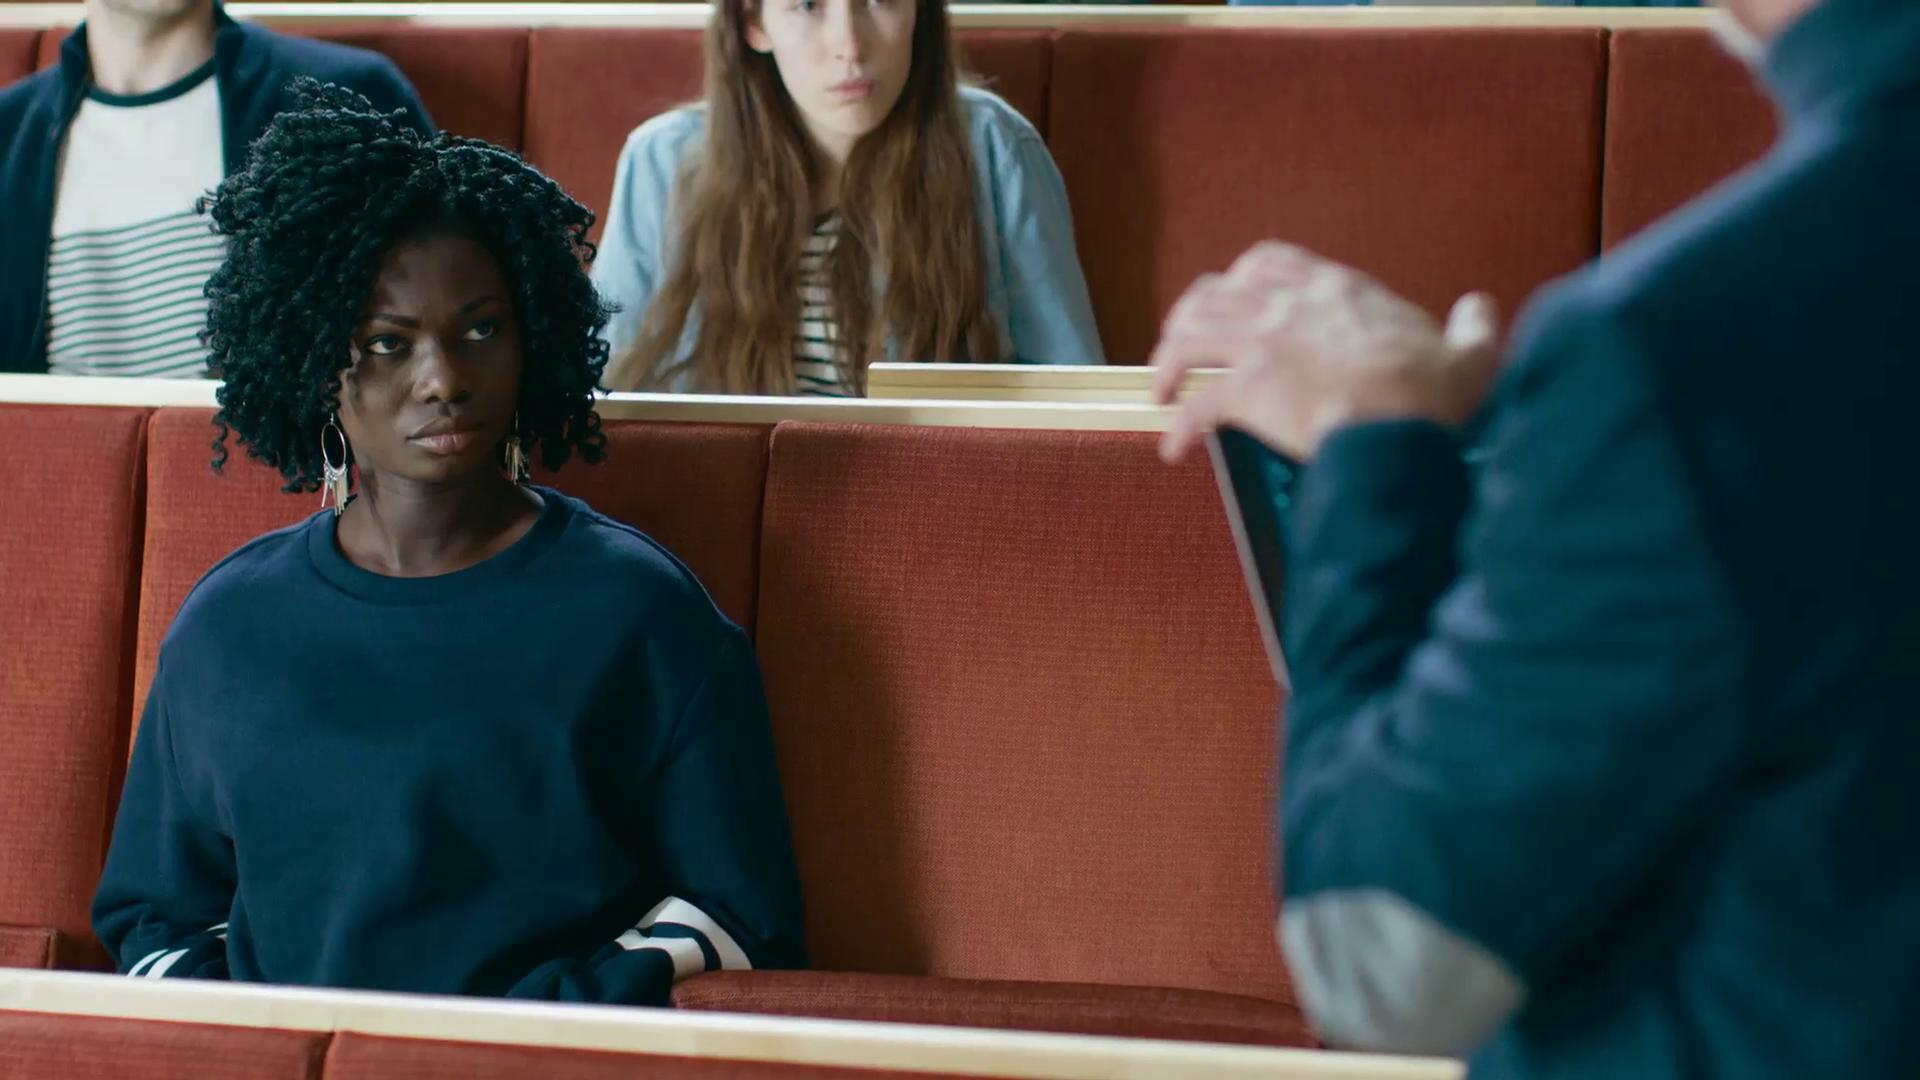

In [ ]:
print("Displaying a frame of video: ",file_name)

video_capture = cv2.VideoCapture(file_name)
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'Total number of frames: {frame_count}')

frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
print(f"Frame rate: {frame_rate}")

video_duration = frame_count / frame_rate
print(f"Video duration: {video_duration:.2f} seconds")

video_capture.release()

frame_number=5
if frame_number > frame_count and frame_count>0:
  frame_number = 1

display_video_frame(file_name, frame_number, size=(135, 90));


In [ ]:
display_video(file_name)

# Dataset of AI generated videos

In [ ]:
lfiles = [
    "jogging1.mp4",
    "jogging2.mp4",
    "skiing1.mp4",
    "soccer_pass.mp4",
    "soccer_player_head.mp4",
    "soccer_player_running.mp4",
    "surfer1.mp4",
    "surfer2.mp4",
    "swimming1.mp4",
    "walking1.mp4",
    "alpinist1.mp4",
    "ball_passing_goal.mp4",
    "basketball1.mp4",
    "basketball2.mp4",
    "basketball3.mp4",
    "basketball4.mp4",
    "basketball5.mp4",
    "female_player_after_scoring.mp4",
    "football1.mp4",
    "football2.mp4",
    "hockey1.mp4"
]

lf = len(lfiles)

# Displaying the thumbnails and videos in the dataset

In [ ]:
# Collecting the video dataset
for i in range(lf):
  file_name = lfiles[i]
  print("Collecting video", file_name)
  print("Downloading video", file_name)
  download_video(file_name)

Downloaded 'jogging1.mp4' successfully.
Downloaded 'jogging2.mp4' successfully.
Downloaded 'skiing1.mp4' successfully.
Downloaded 'soccer_pass.mp4' successfully.
Downloaded 'soccer_player_head.mp4' successfully.
Downloaded 'soccer_player_running.mp4' successfully.
Downloaded 'surfer1.mp4' successfully.
Downloaded 'surfer2.mp4' successfully.
Downloaded 'swimming1.mp4' successfully.
Downloaded 'walking1.mp4' successfully.
Downloaded 'alpinist1.mp4' successfully.
Downloaded 'ball_passing_goal.mp4' successfully.
Downloaded 'basketball1.mp4' successfully.
Downloaded 'basketball2.mp4' successfully.
Downloaded 'basketball3.mp4' successfully.
Downloaded 'basketball4.mp4' successfully.
Downloaded 'basketball5.mp4' successfully.
Downloaded 'female_player_after_scoring.mp4' successfully.
Downloaded 'football1.mp4' successfully.
Downloaded 'football2.mp4' successfully.
Downloaded 'hockey1.mp4' successfully.


# Thumbnail of the videos

Displaying a frame of video:  jogging1.mp4
Total number of frames: 166
Frame rate: 30.0
Video duration: 5.53 seconds



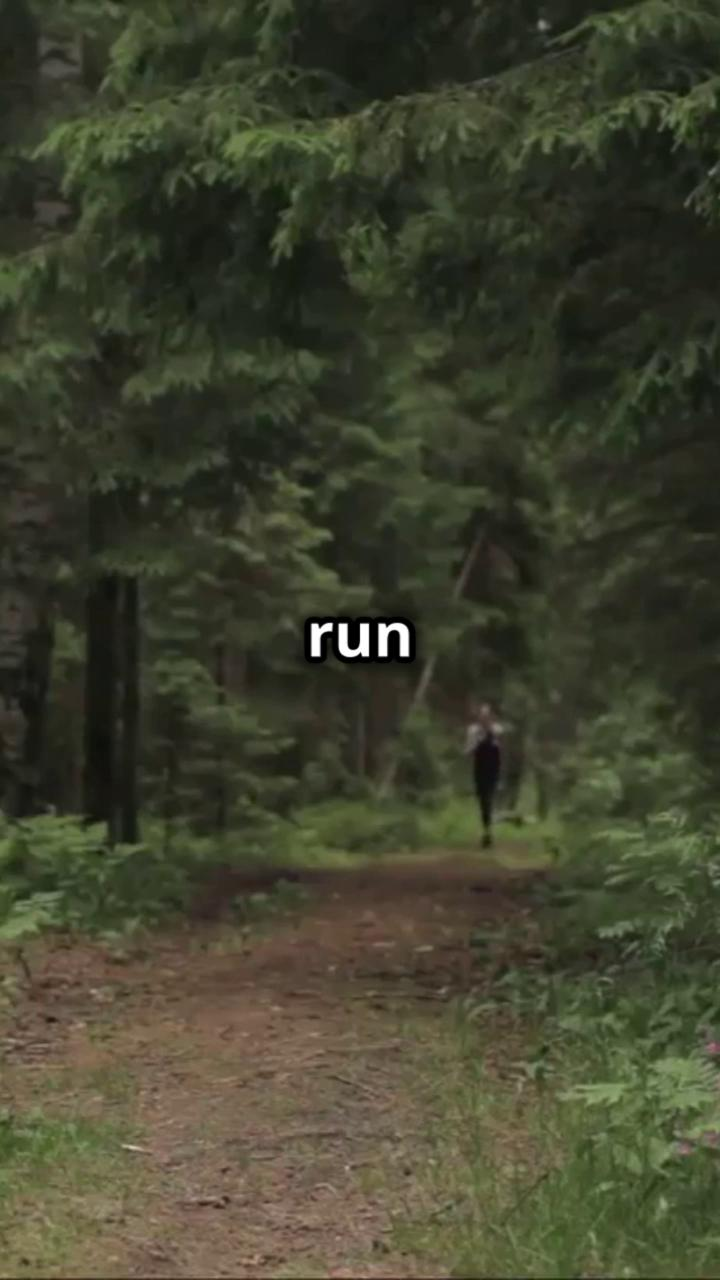

Displaying a frame of video:  jogging2.mp4
Total number of frames: 156
Frame rate: 30.0
Video duration: 5.20 seconds



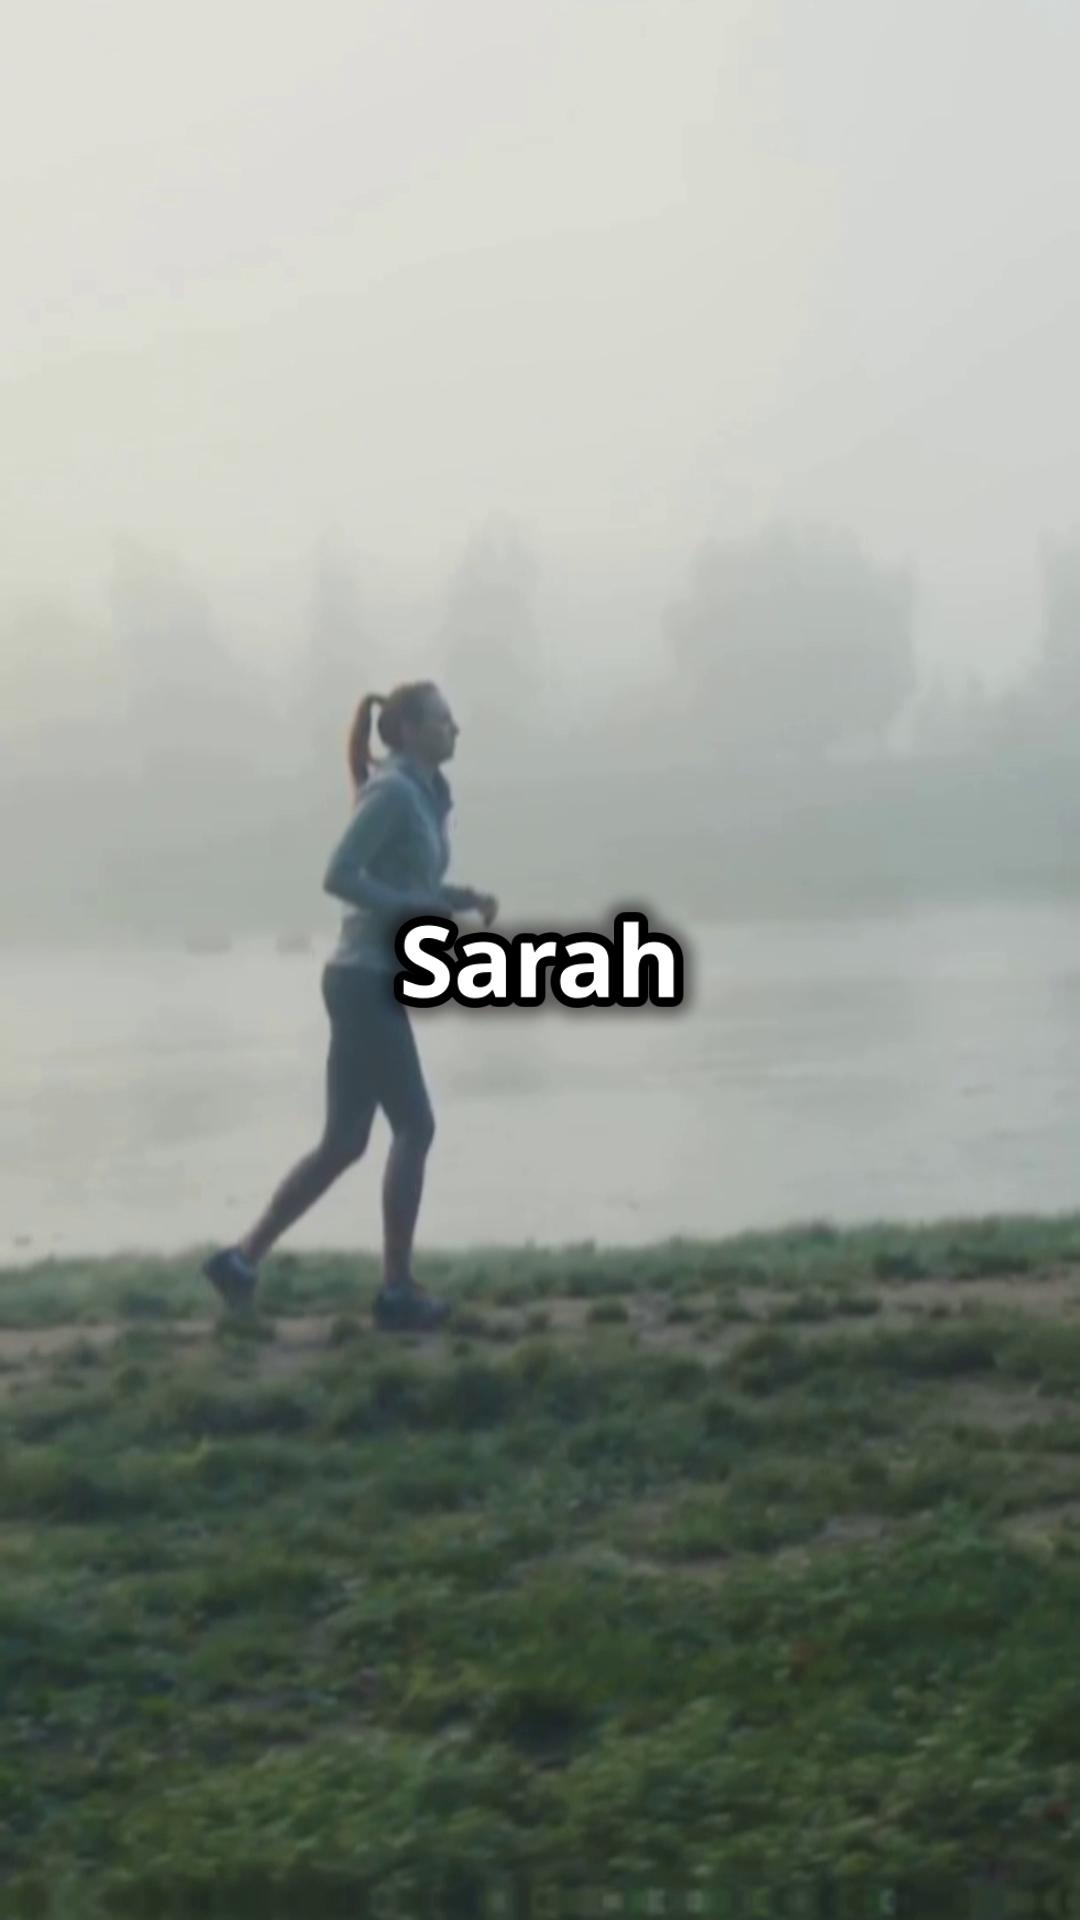

Displaying a frame of video:  skiing1.mp4
Total number of frames: 58
Frame rate: 30.526315789473685
Video duration: 1.90 seconds



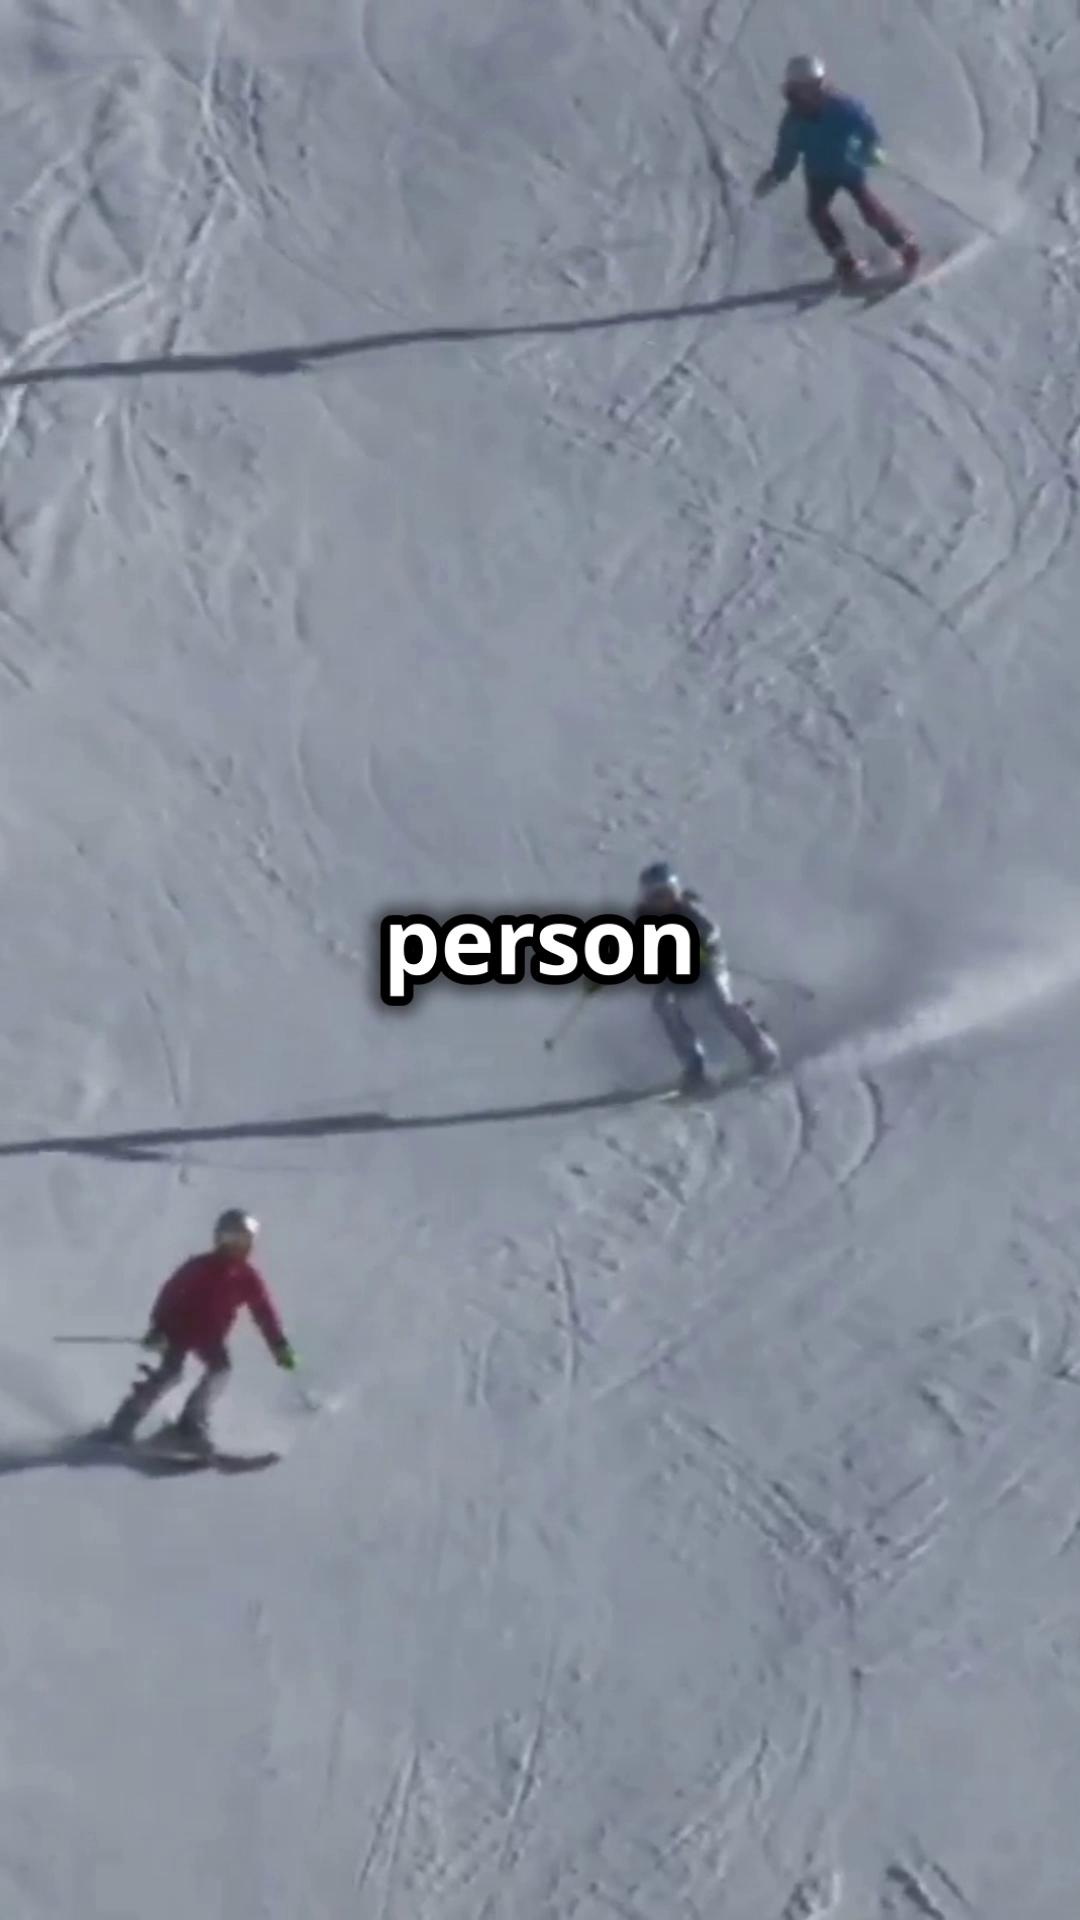

Displaying a frame of video:  soccer_pass.mp4
Total number of frames: 124
Frame rate: 30.0
Video duration: 4.13 seconds



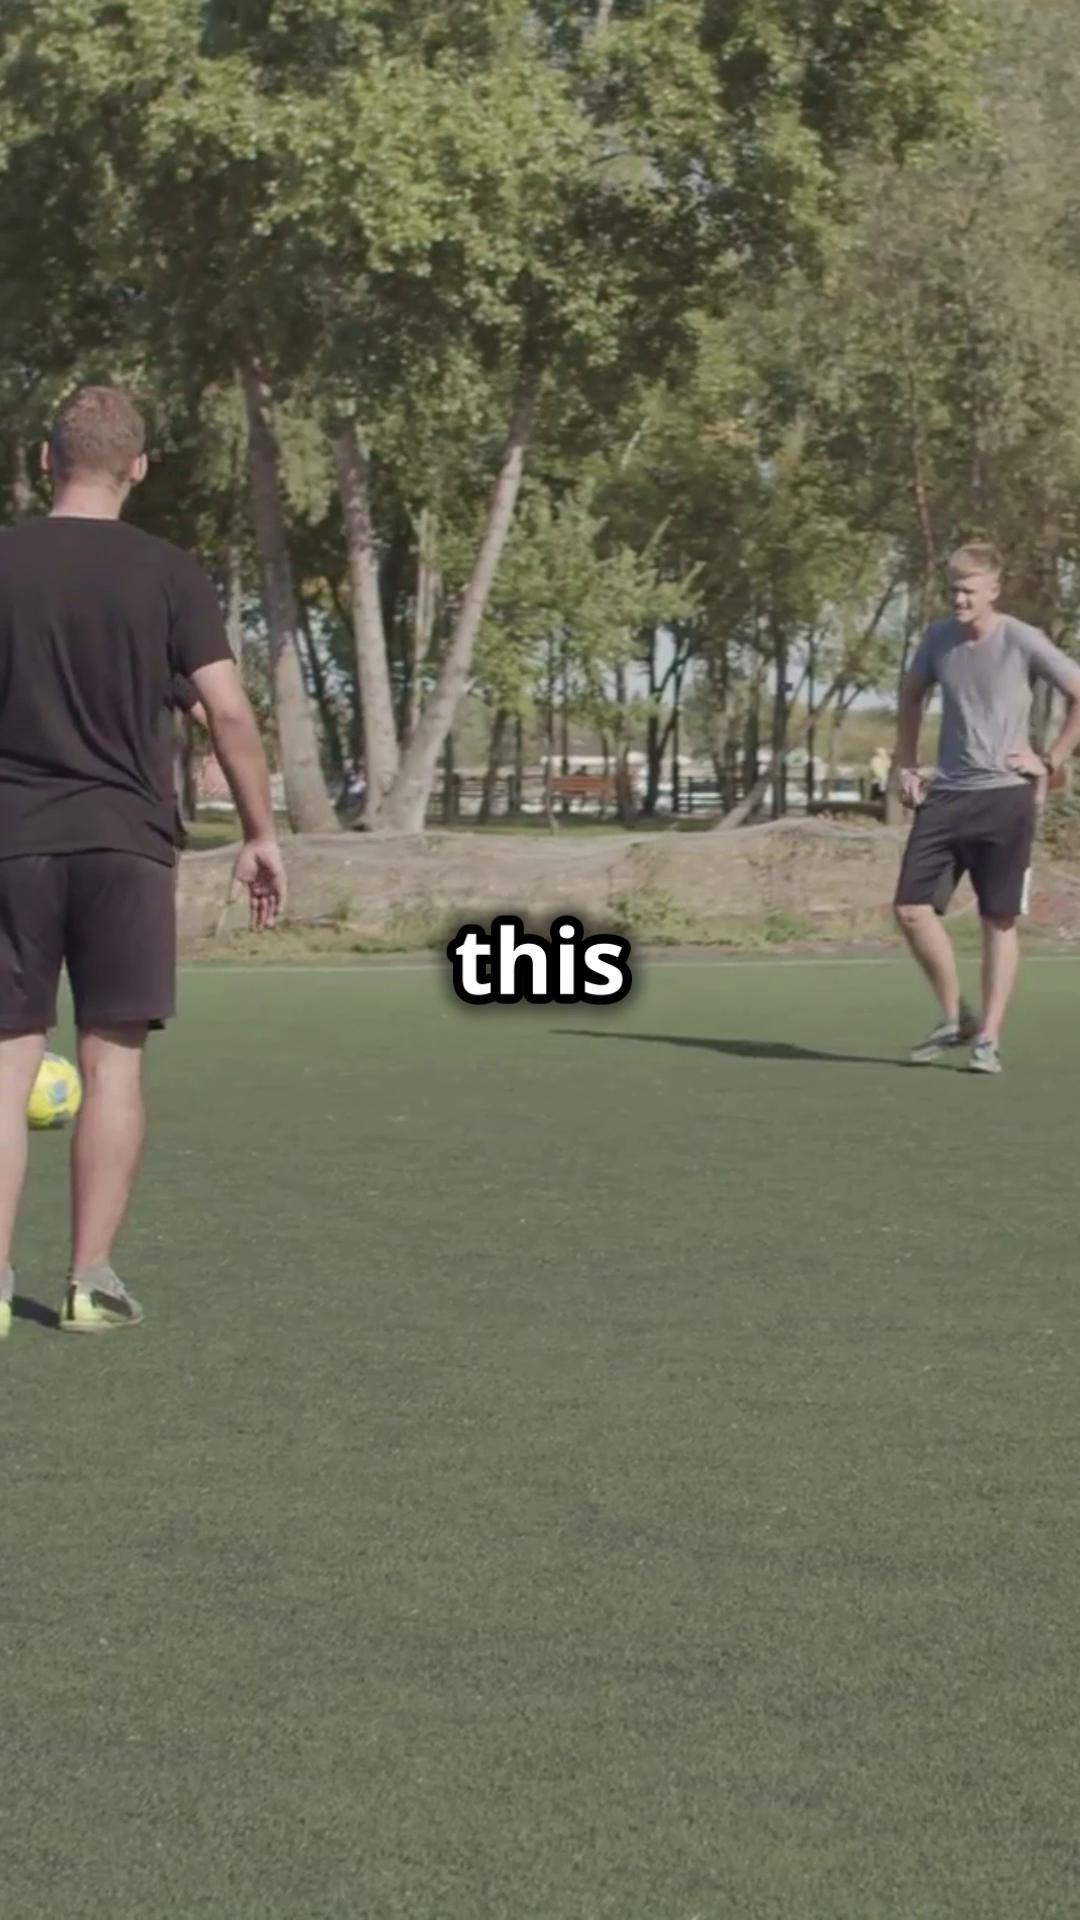

Displaying a frame of video:  soccer_player_head.mp4
Total number of frames: 197
Frame rate: 30.0
Video duration: 6.57 seconds



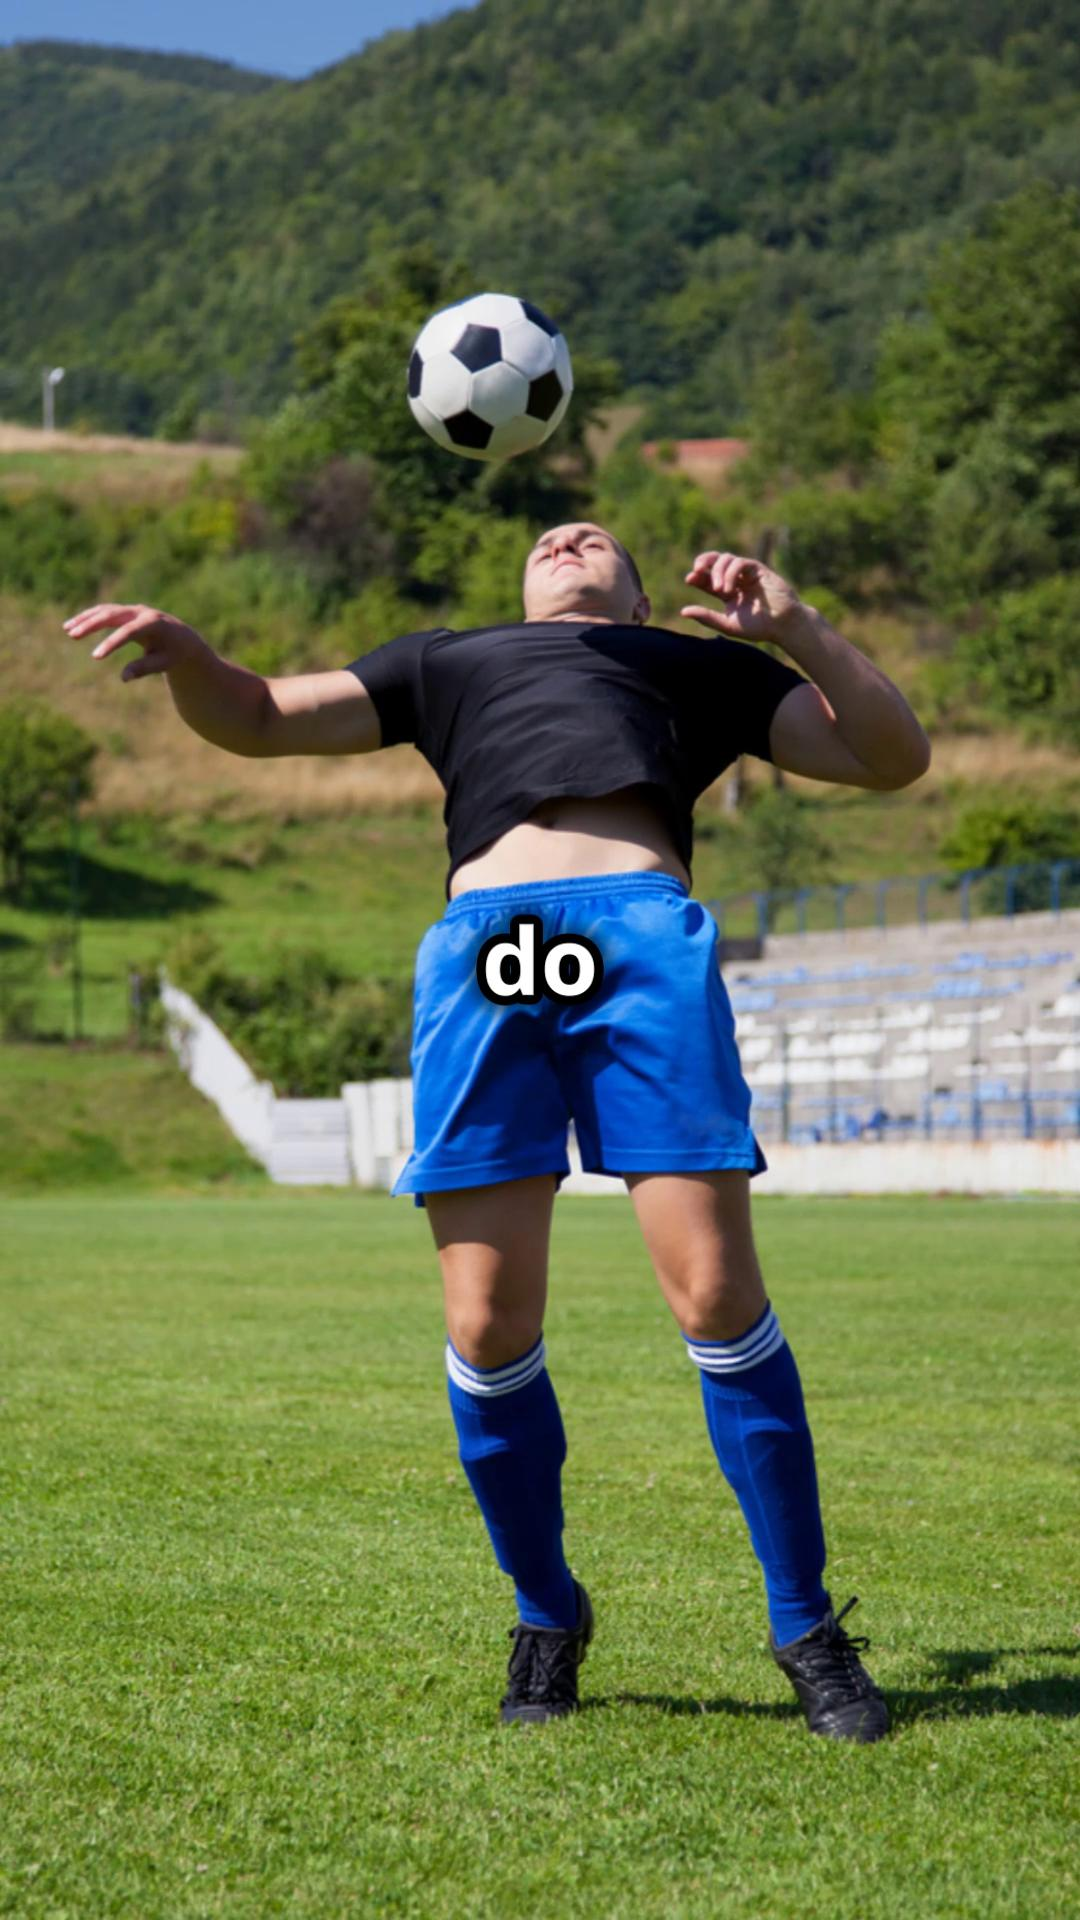

Displaying a frame of video:  soccer_player_running.mp4
Total number of frames: 131
Frame rate: 30.0
Video duration: 4.37 seconds



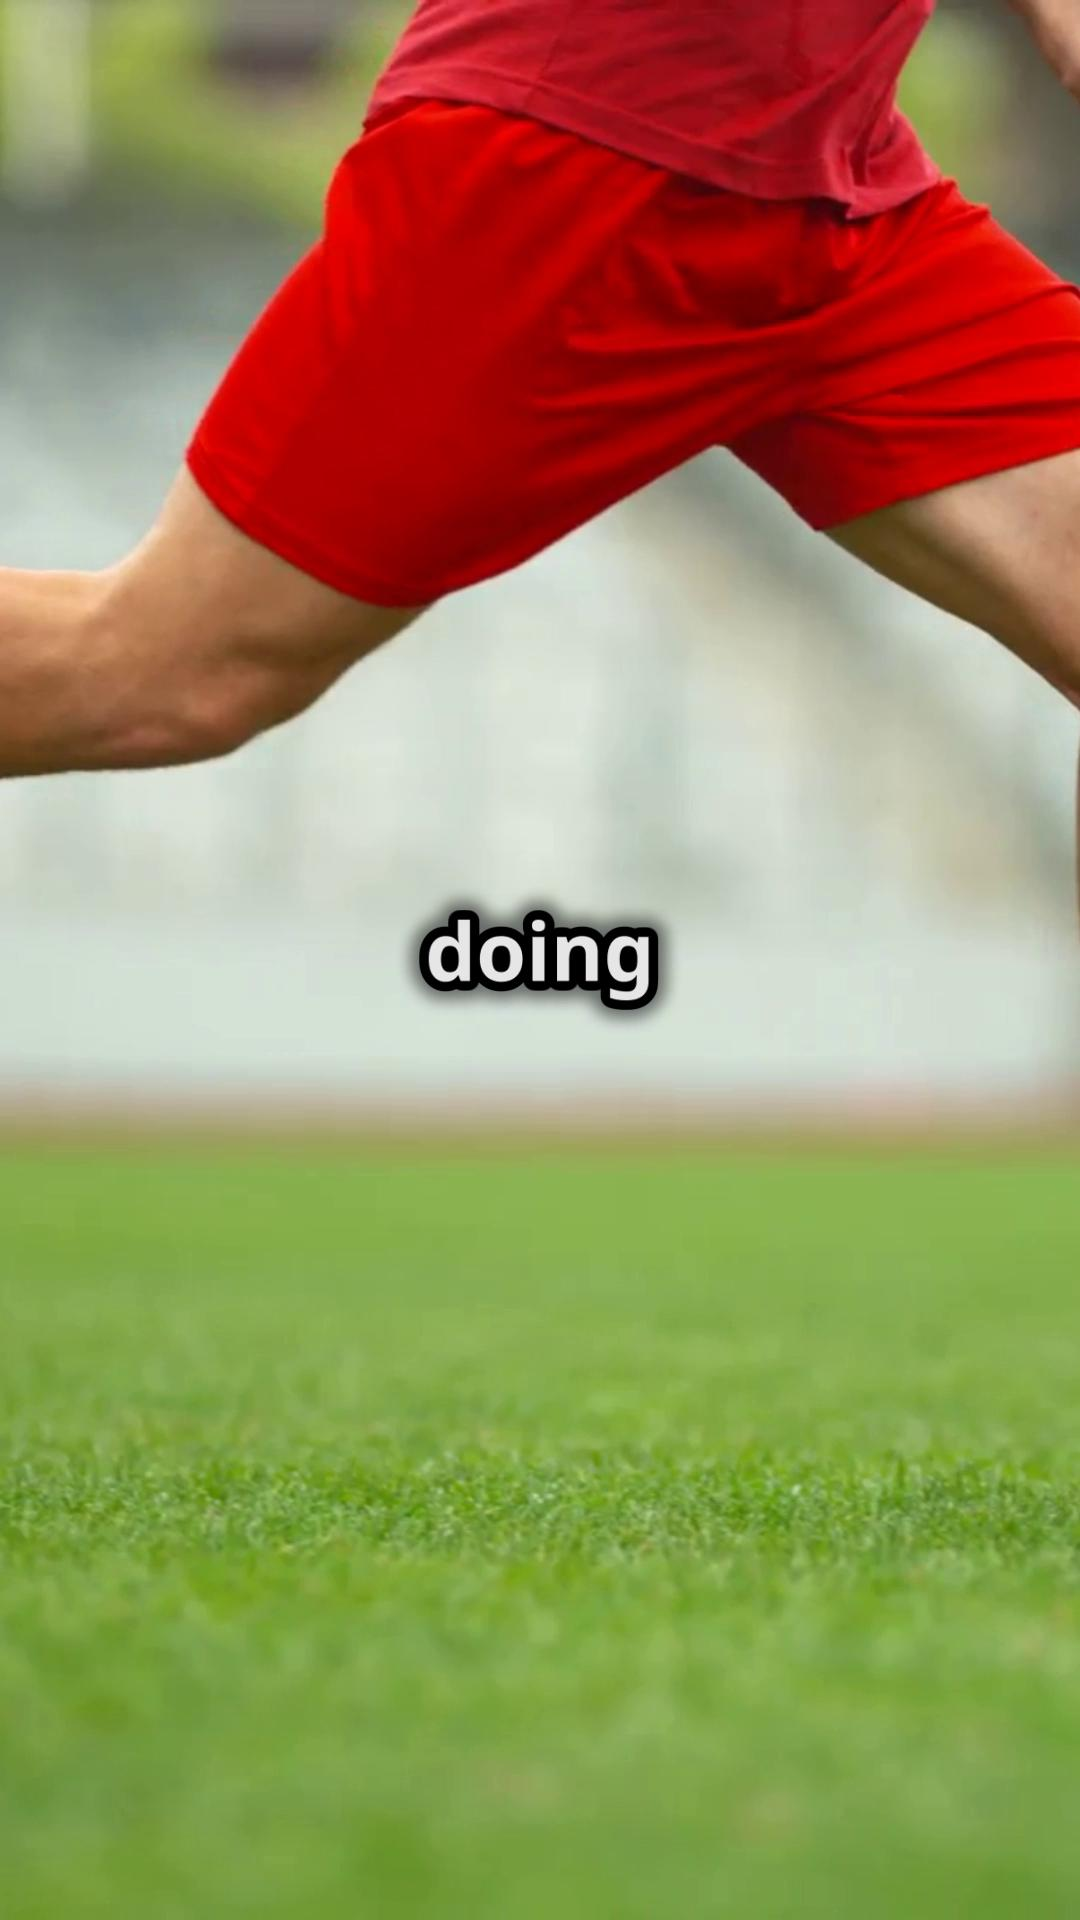

Displaying a frame of video:  surfer1.mp4
Total number of frames: 195
Frame rate: 30.0
Video duration: 6.50 seconds



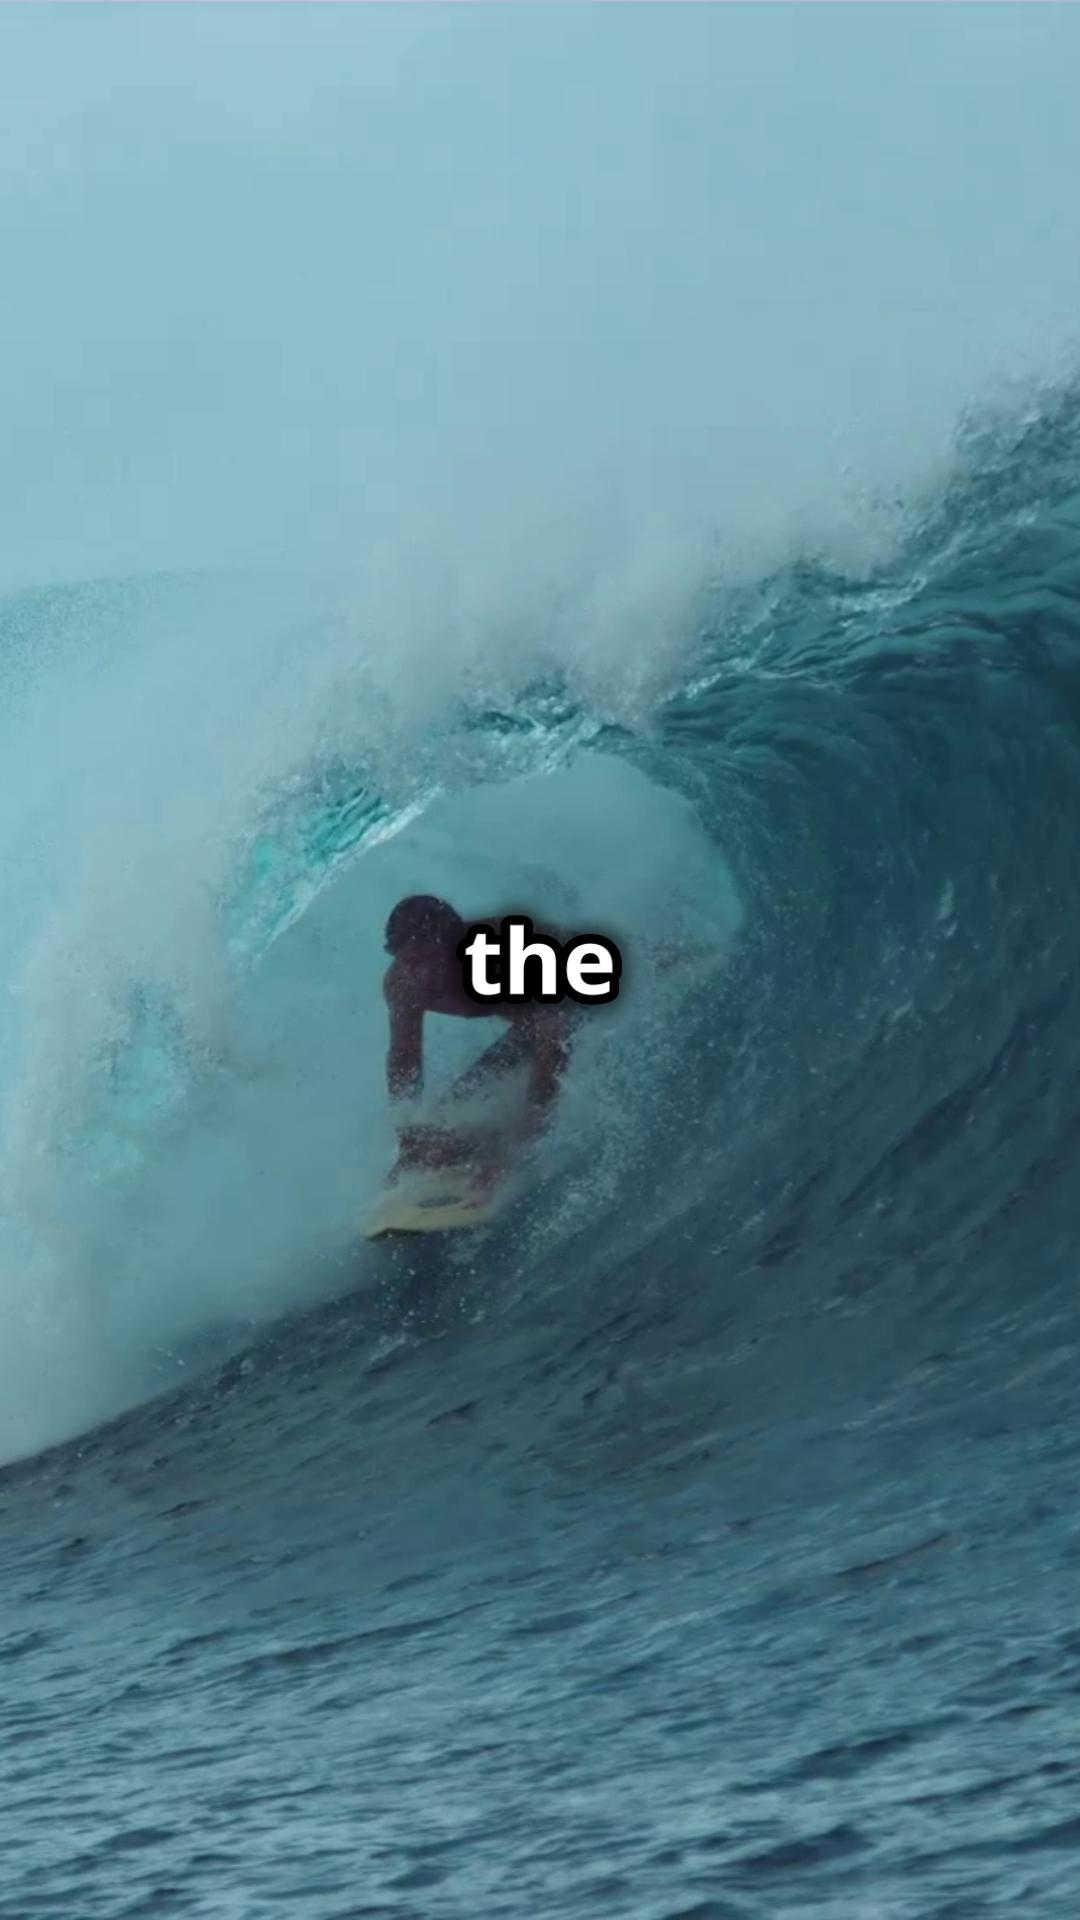

Displaying a frame of video:  surfer2.mp4
Total number of frames: 236
Frame rate: 30.0
Video duration: 7.87 seconds



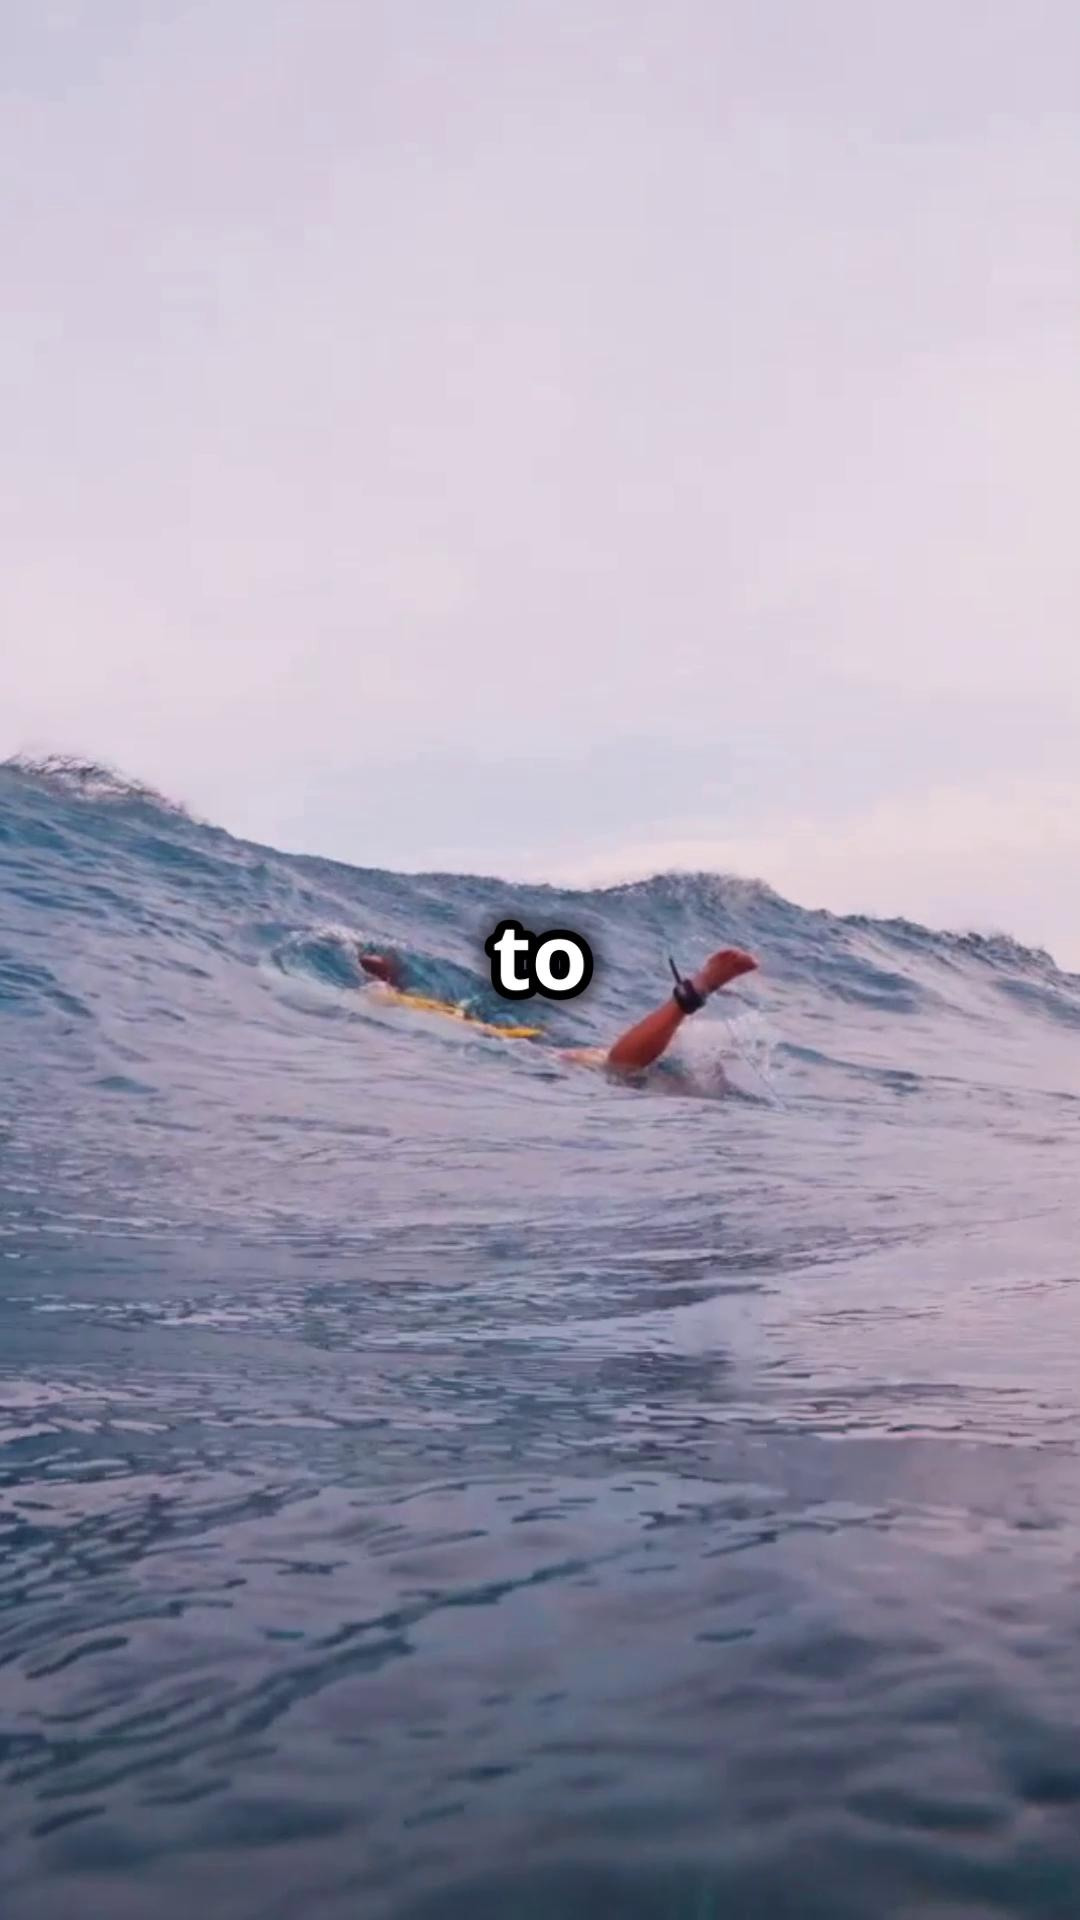

Displaying a frame of video:  swimming1.mp4
Total number of frames: 254
Frame rate: 30.0
Video duration: 8.47 seconds



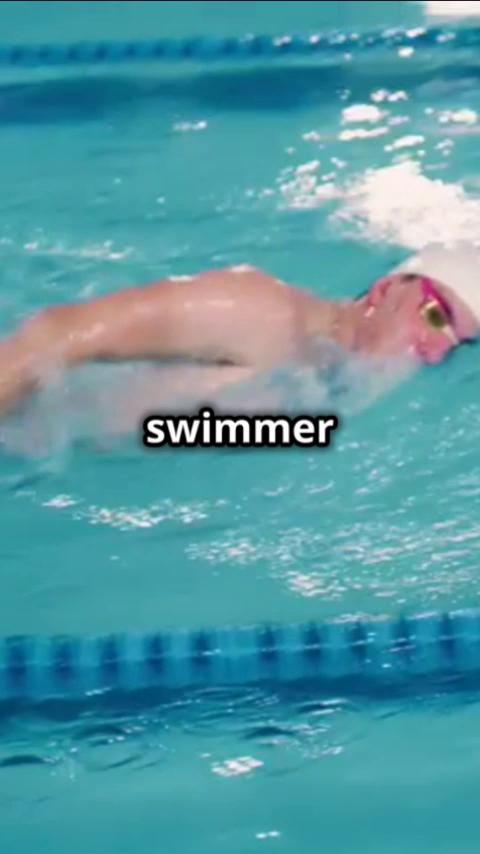

Displaying a frame of video:  walking1.mp4
Total number of frames: 391
Frame rate: 30.0
Video duration: 13.03 seconds



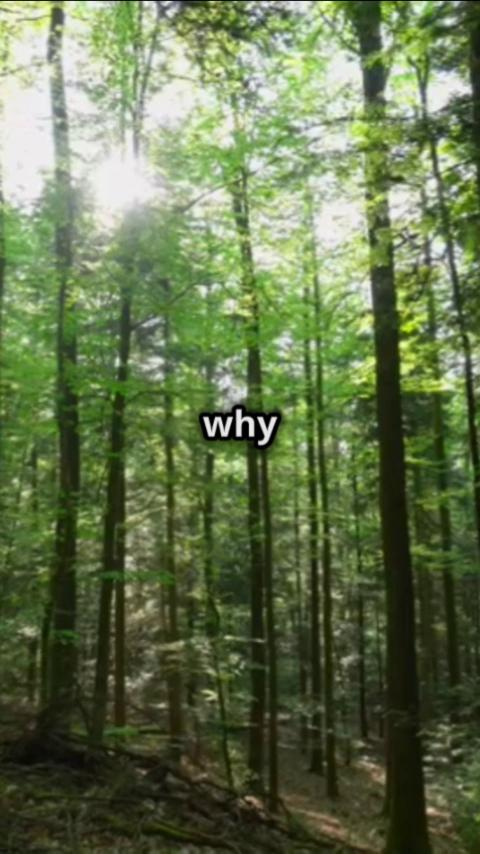

Displaying a frame of video:  alpinist1.mp4
Total number of frames: 208
Frame rate: 30.0
Video duration: 6.93 seconds



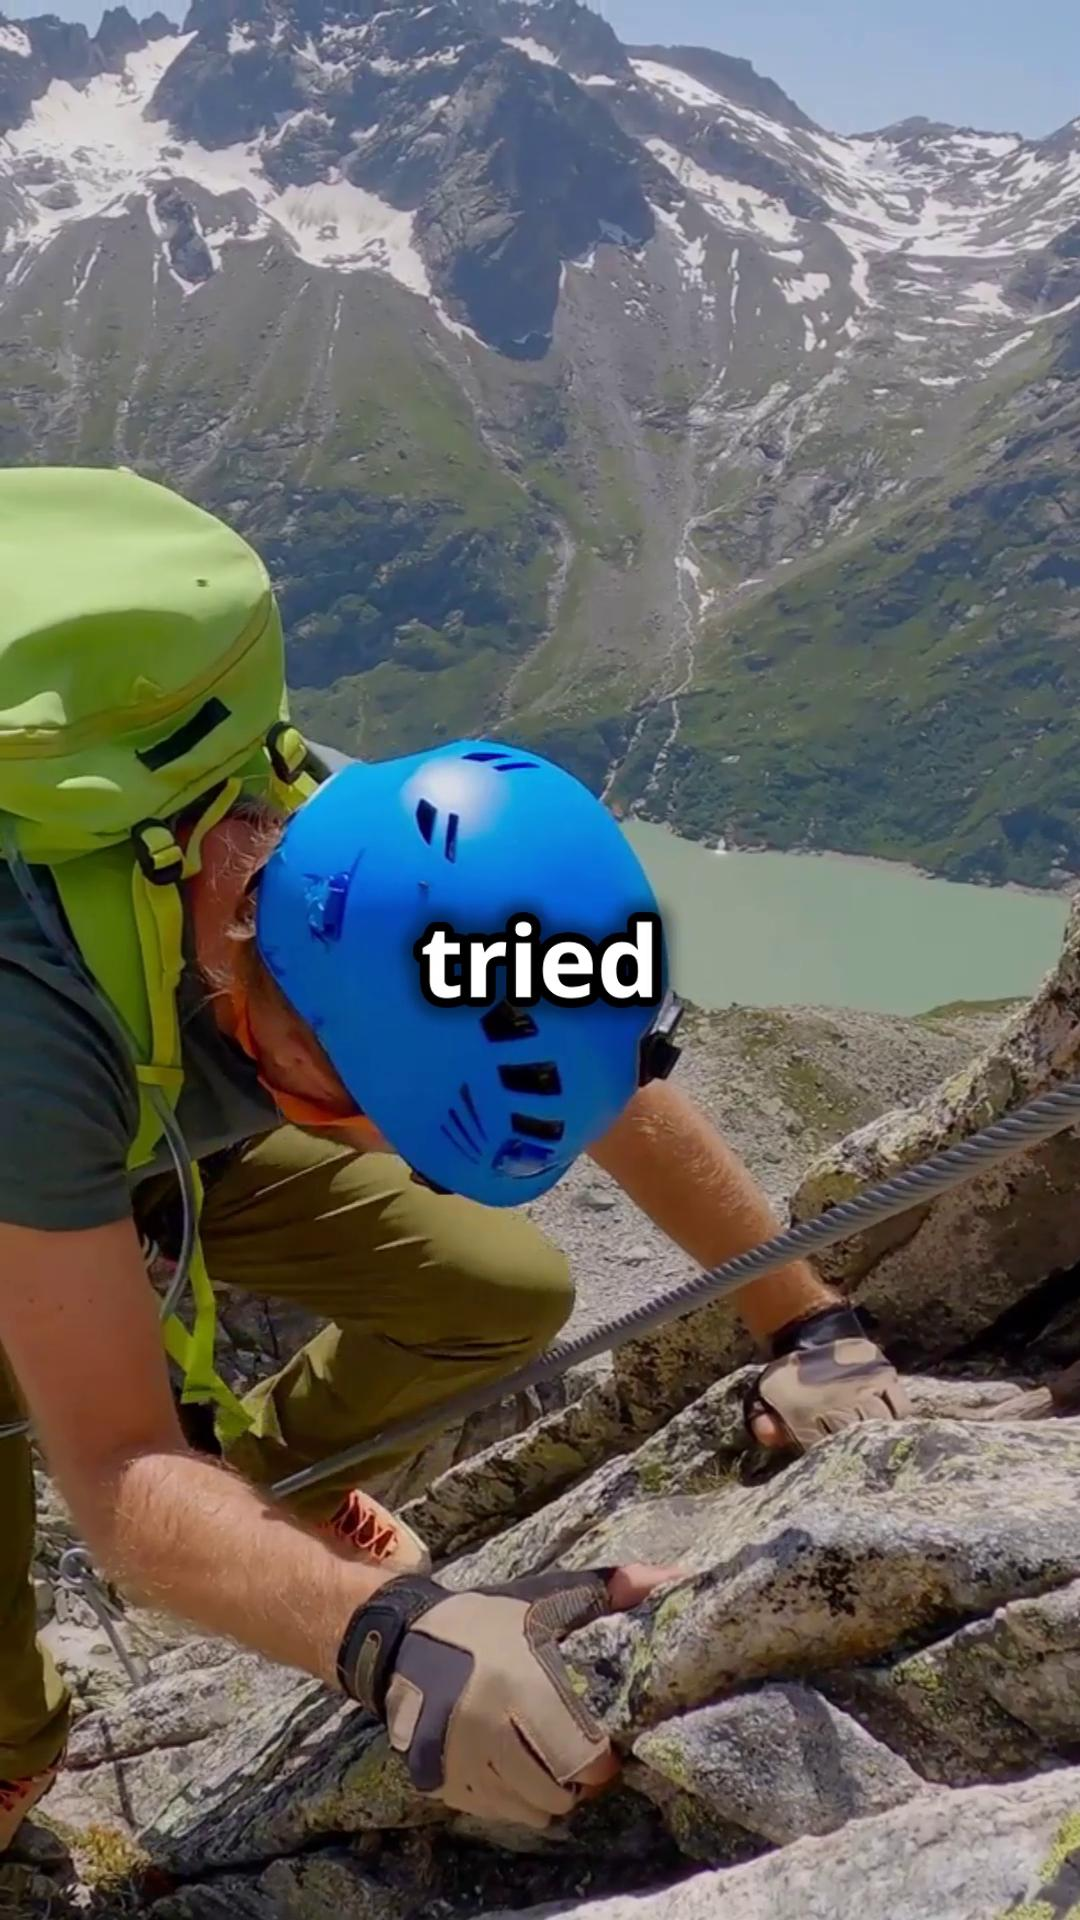

Displaying a frame of video:  ball_passing_goal.mp4
Total number of frames: 138
Frame rate: 30.0
Video duration: 4.60 seconds



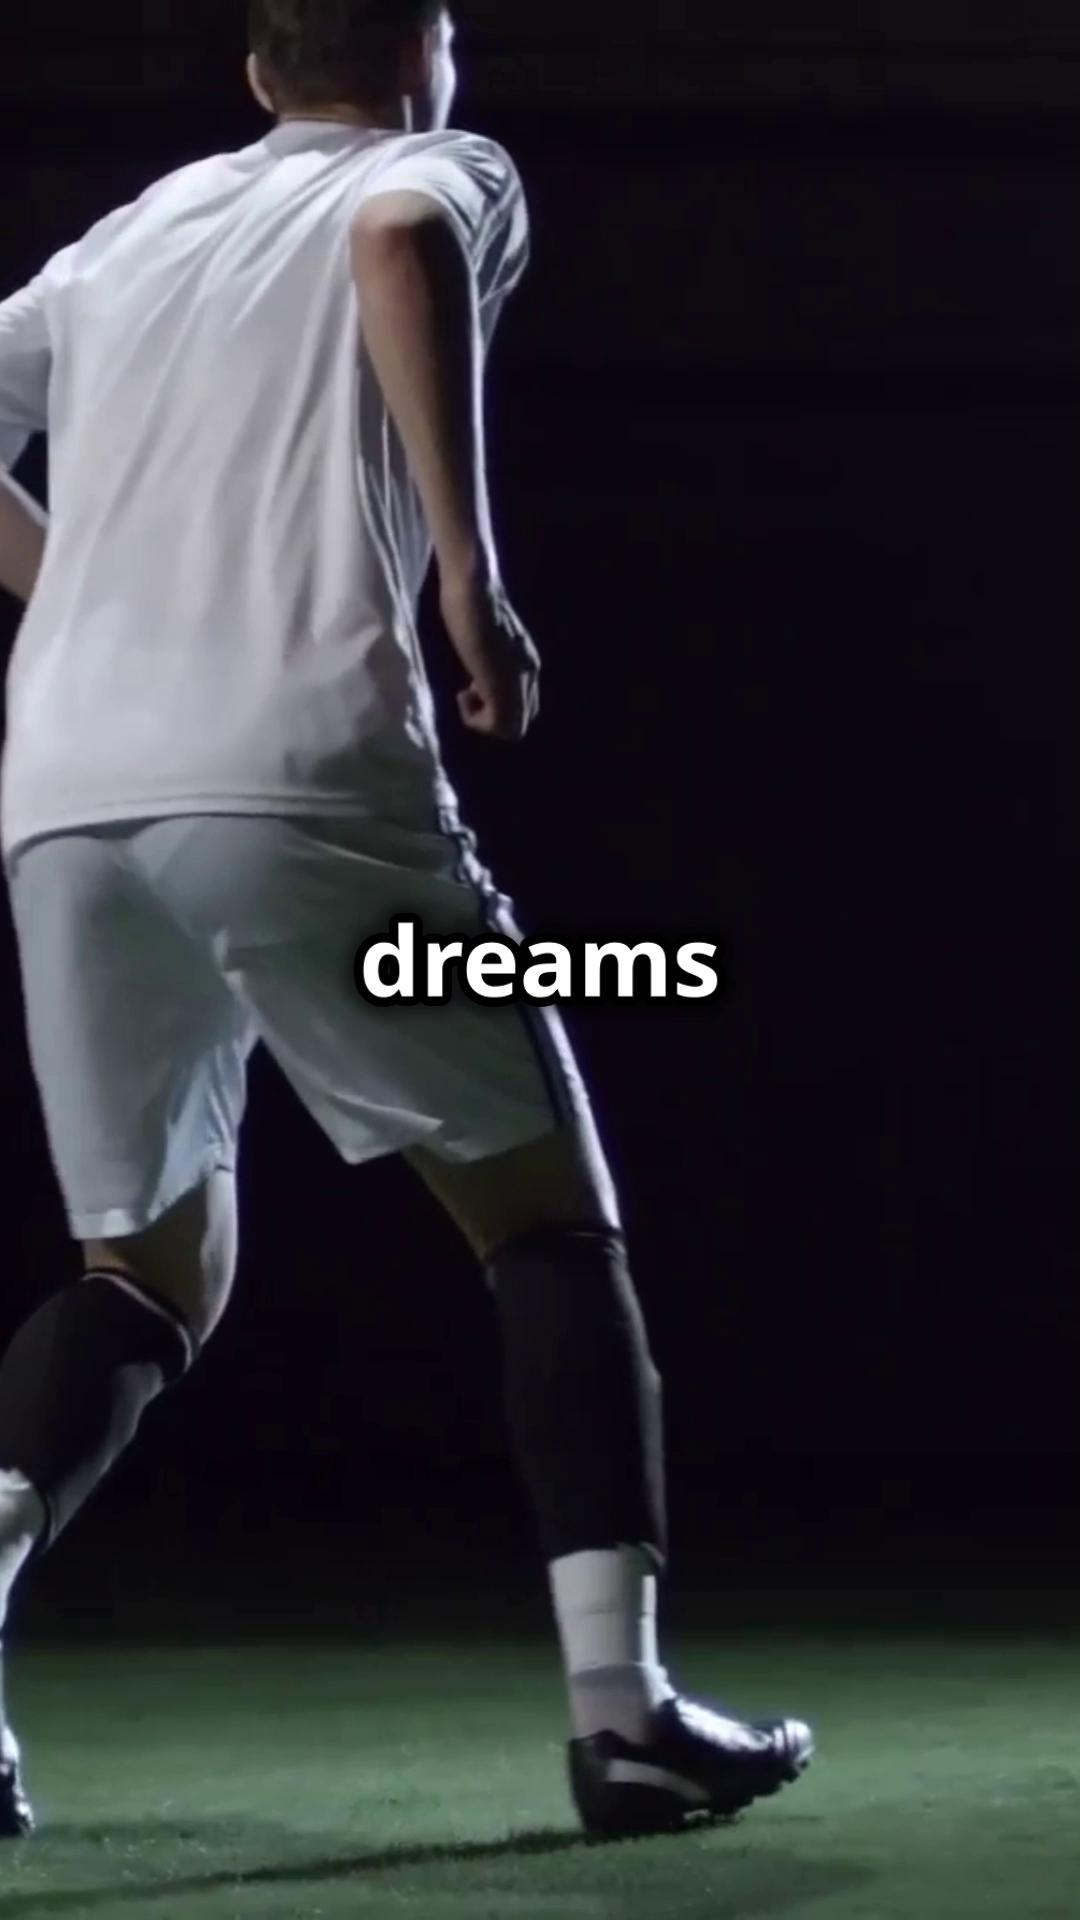

Displaying a frame of video:  basketball1.mp4
Total number of frames: 97
Frame rate: 30.0
Video duration: 3.23 seconds



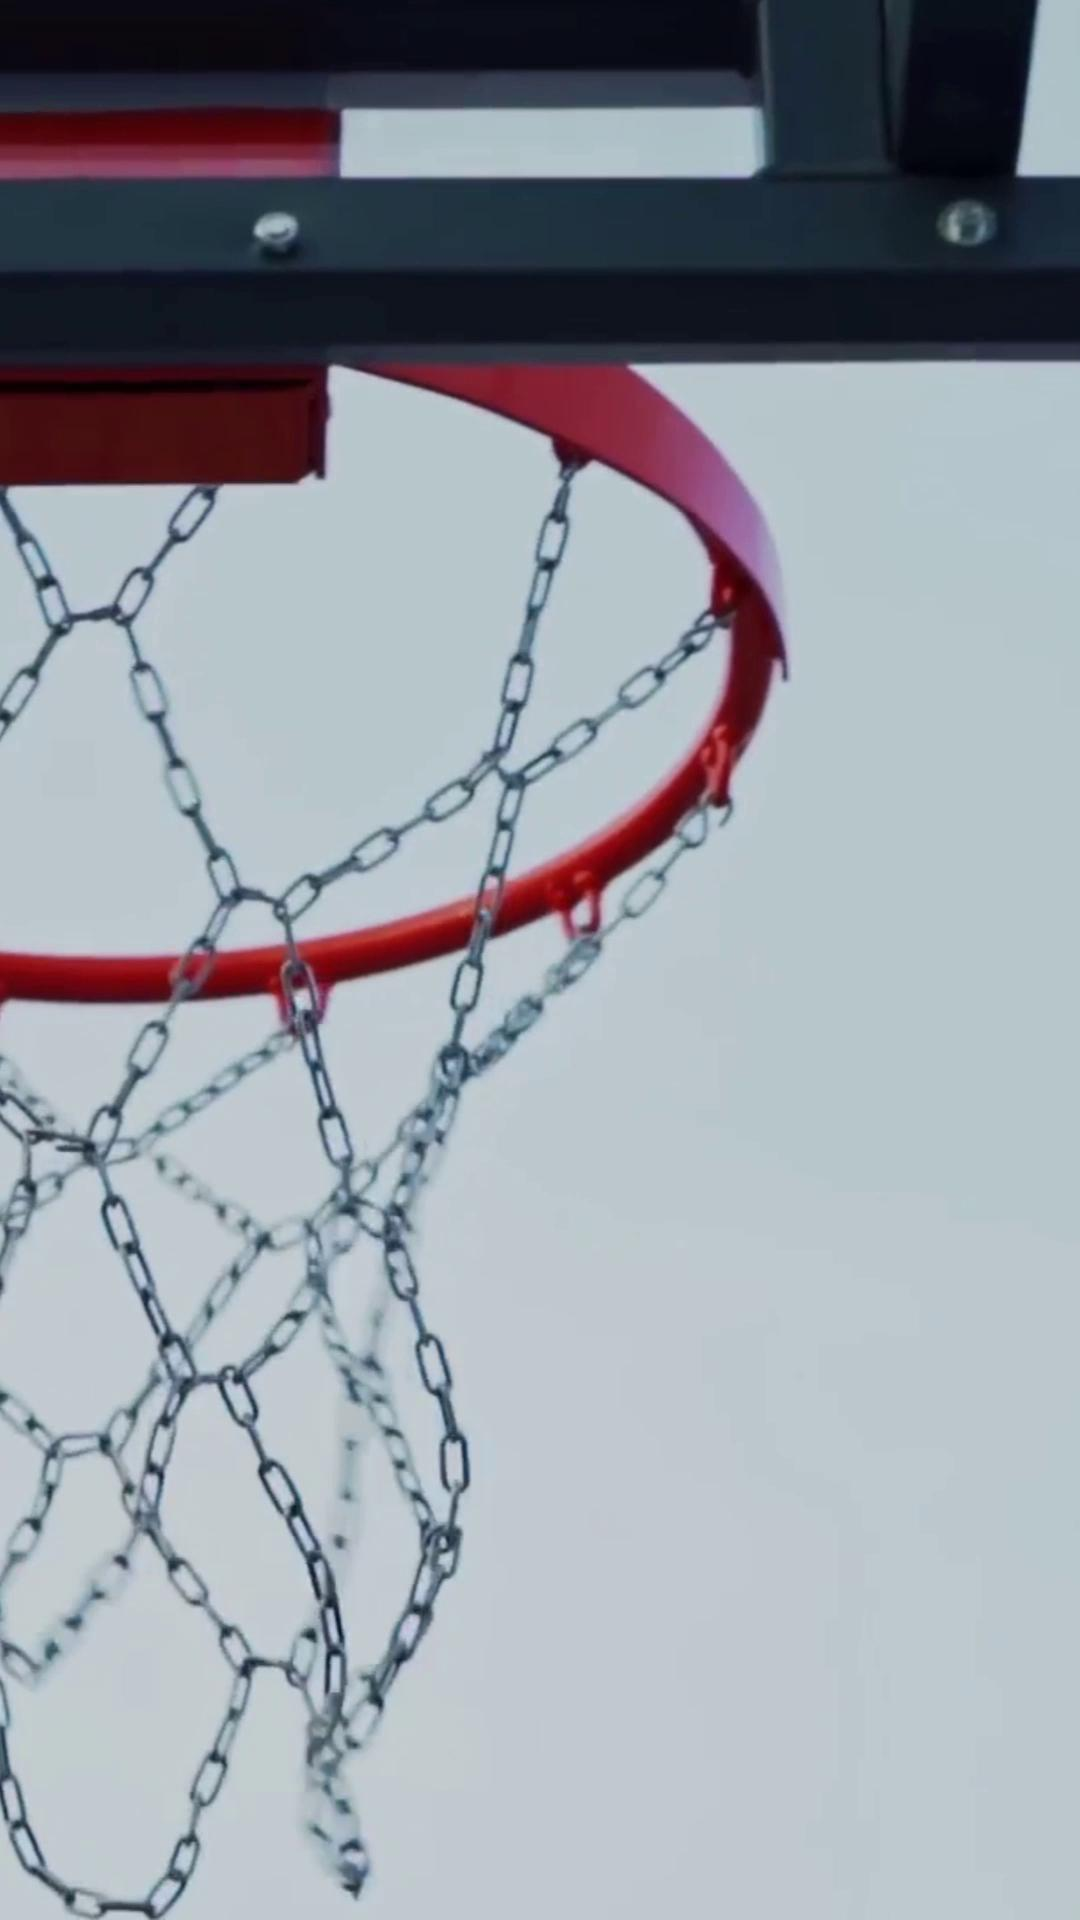

Displaying a frame of video:  basketball2.mp4
Total number of frames: 139
Frame rate: 30.0
Video duration: 4.63 seconds



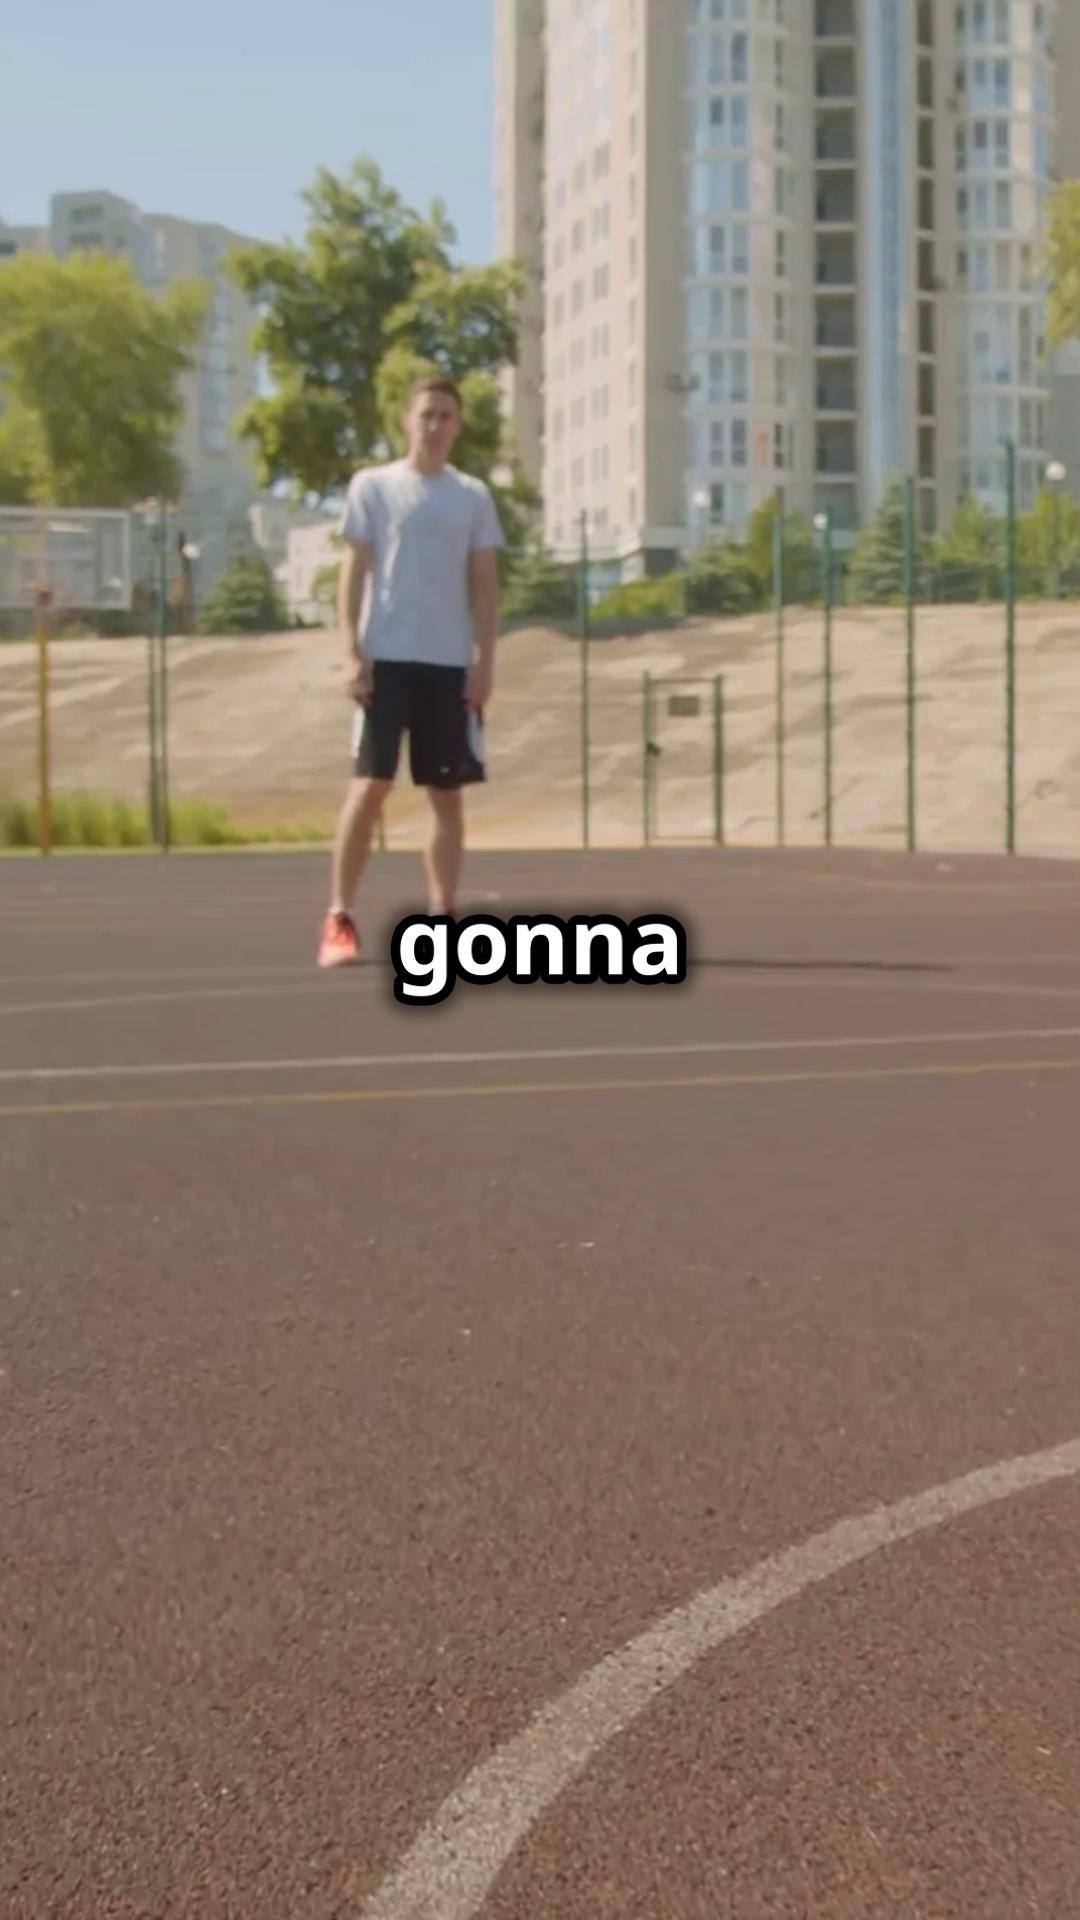

Displaying a frame of video:  basketball3.mp4
Total number of frames: 222
Frame rate: 30.0
Video duration: 7.40 seconds



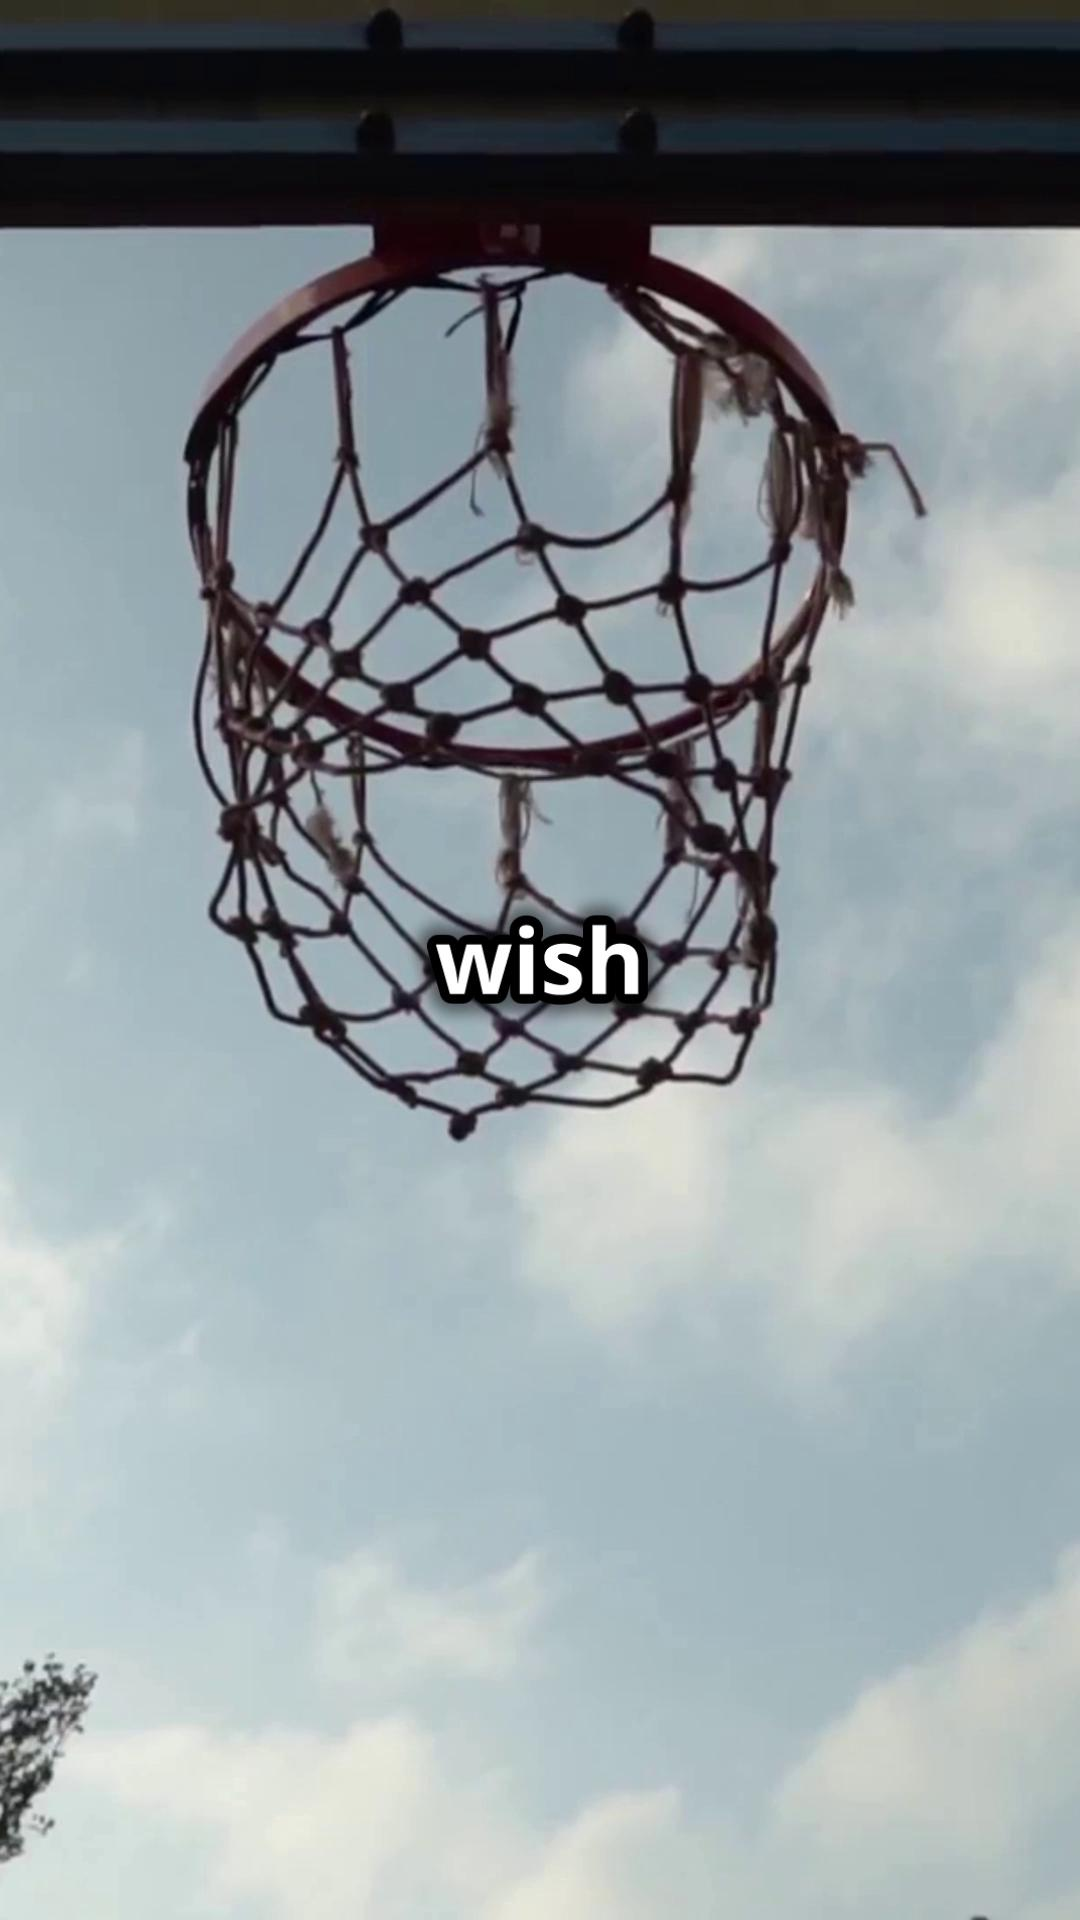

Displaying a frame of video:  basketball4.mp4
Total number of frames: 137
Frame rate: 30.0
Video duration: 4.57 seconds



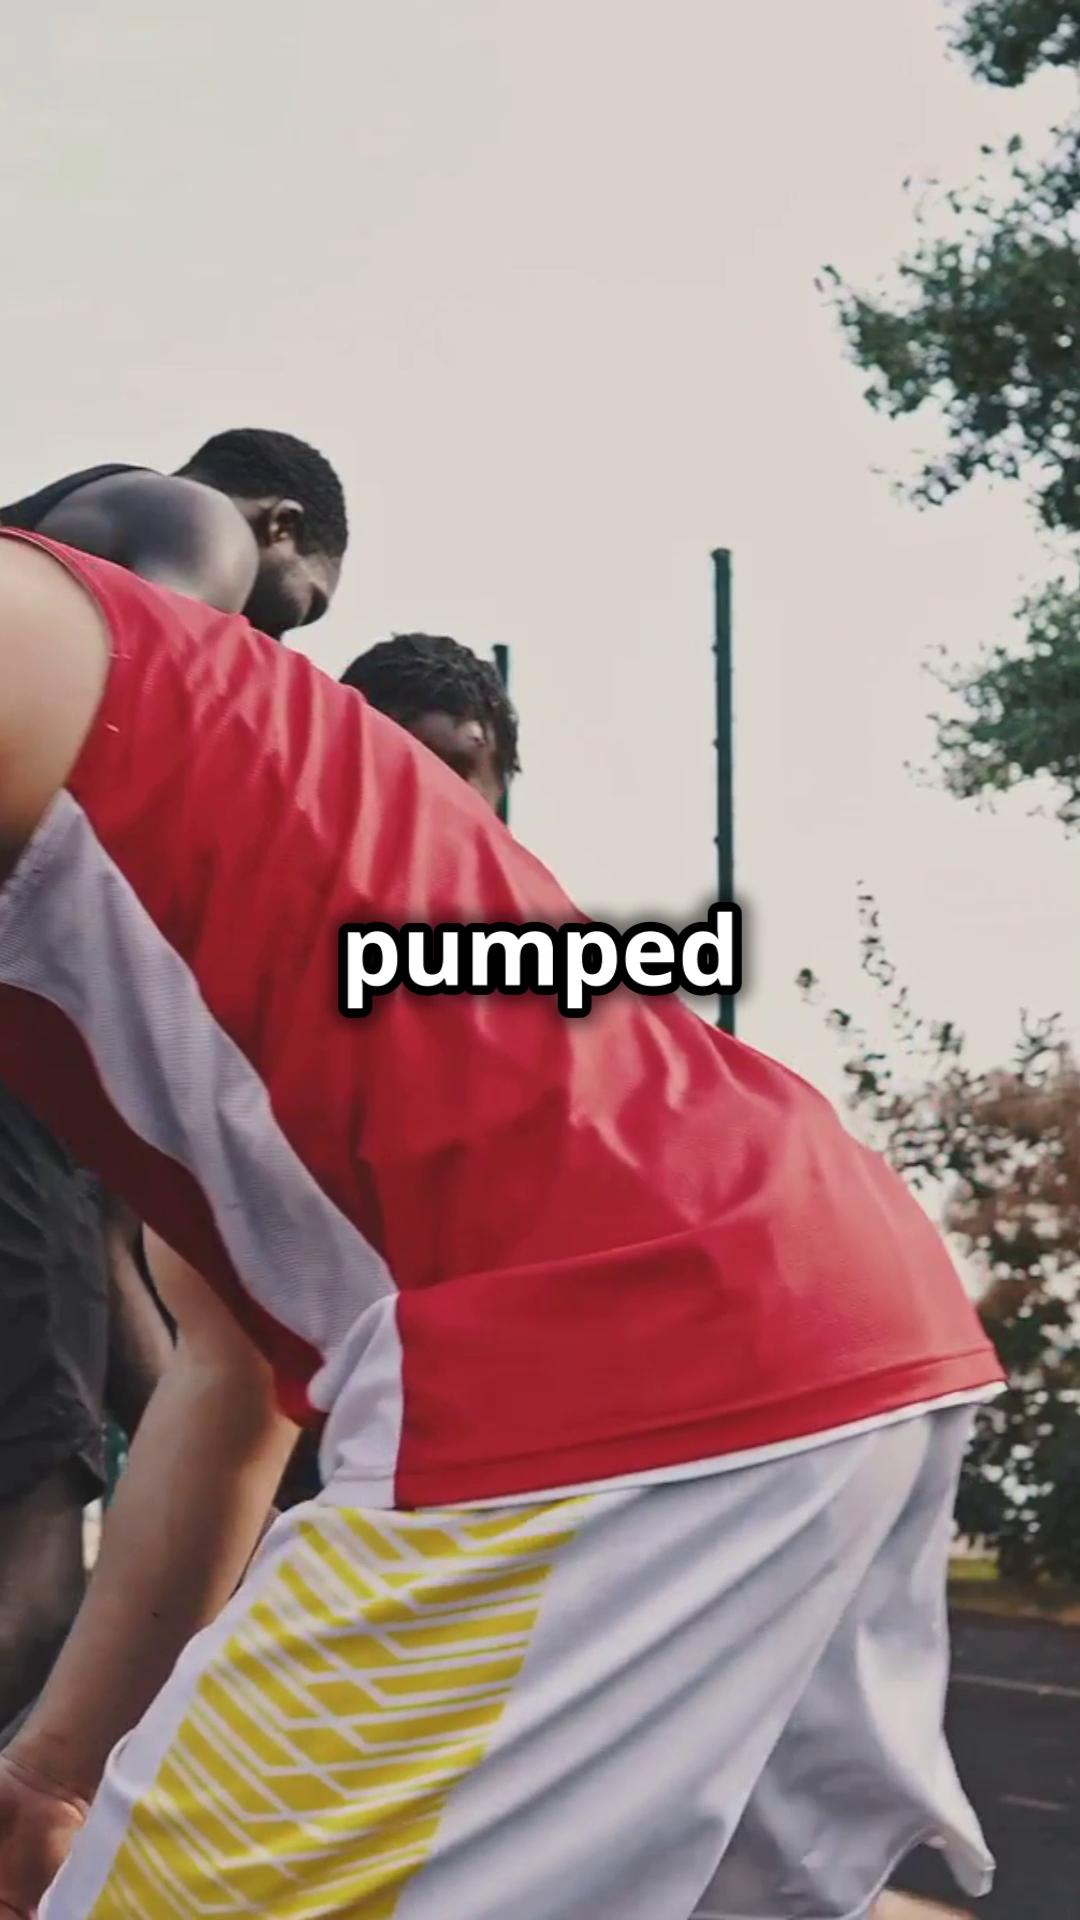

Displaying a frame of video:  basketball5.mp4
Total number of frames: 172
Frame rate: 30.0
Video duration: 5.73 seconds



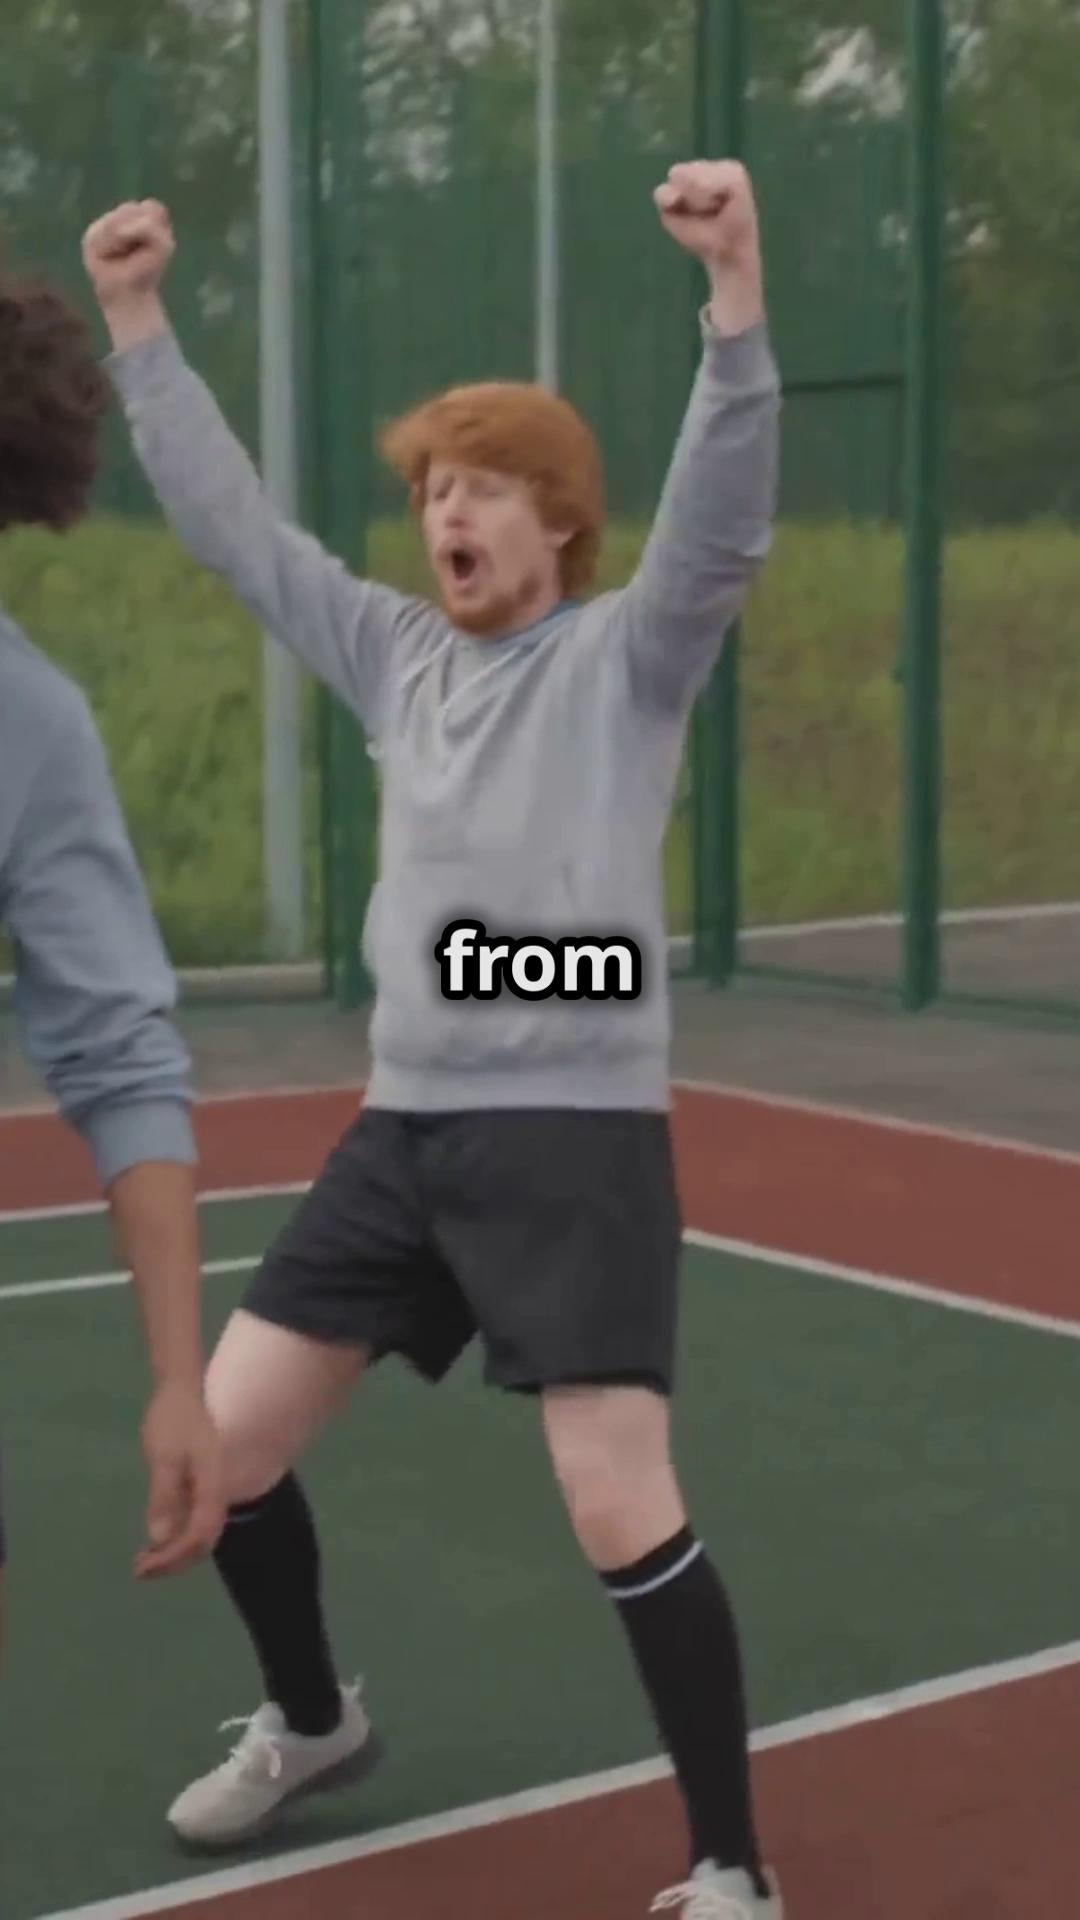

Displaying a frame of video:  female_player_after_scoring.mp4
Total number of frames: 210
Frame rate: 30.0
Video duration: 7.00 seconds



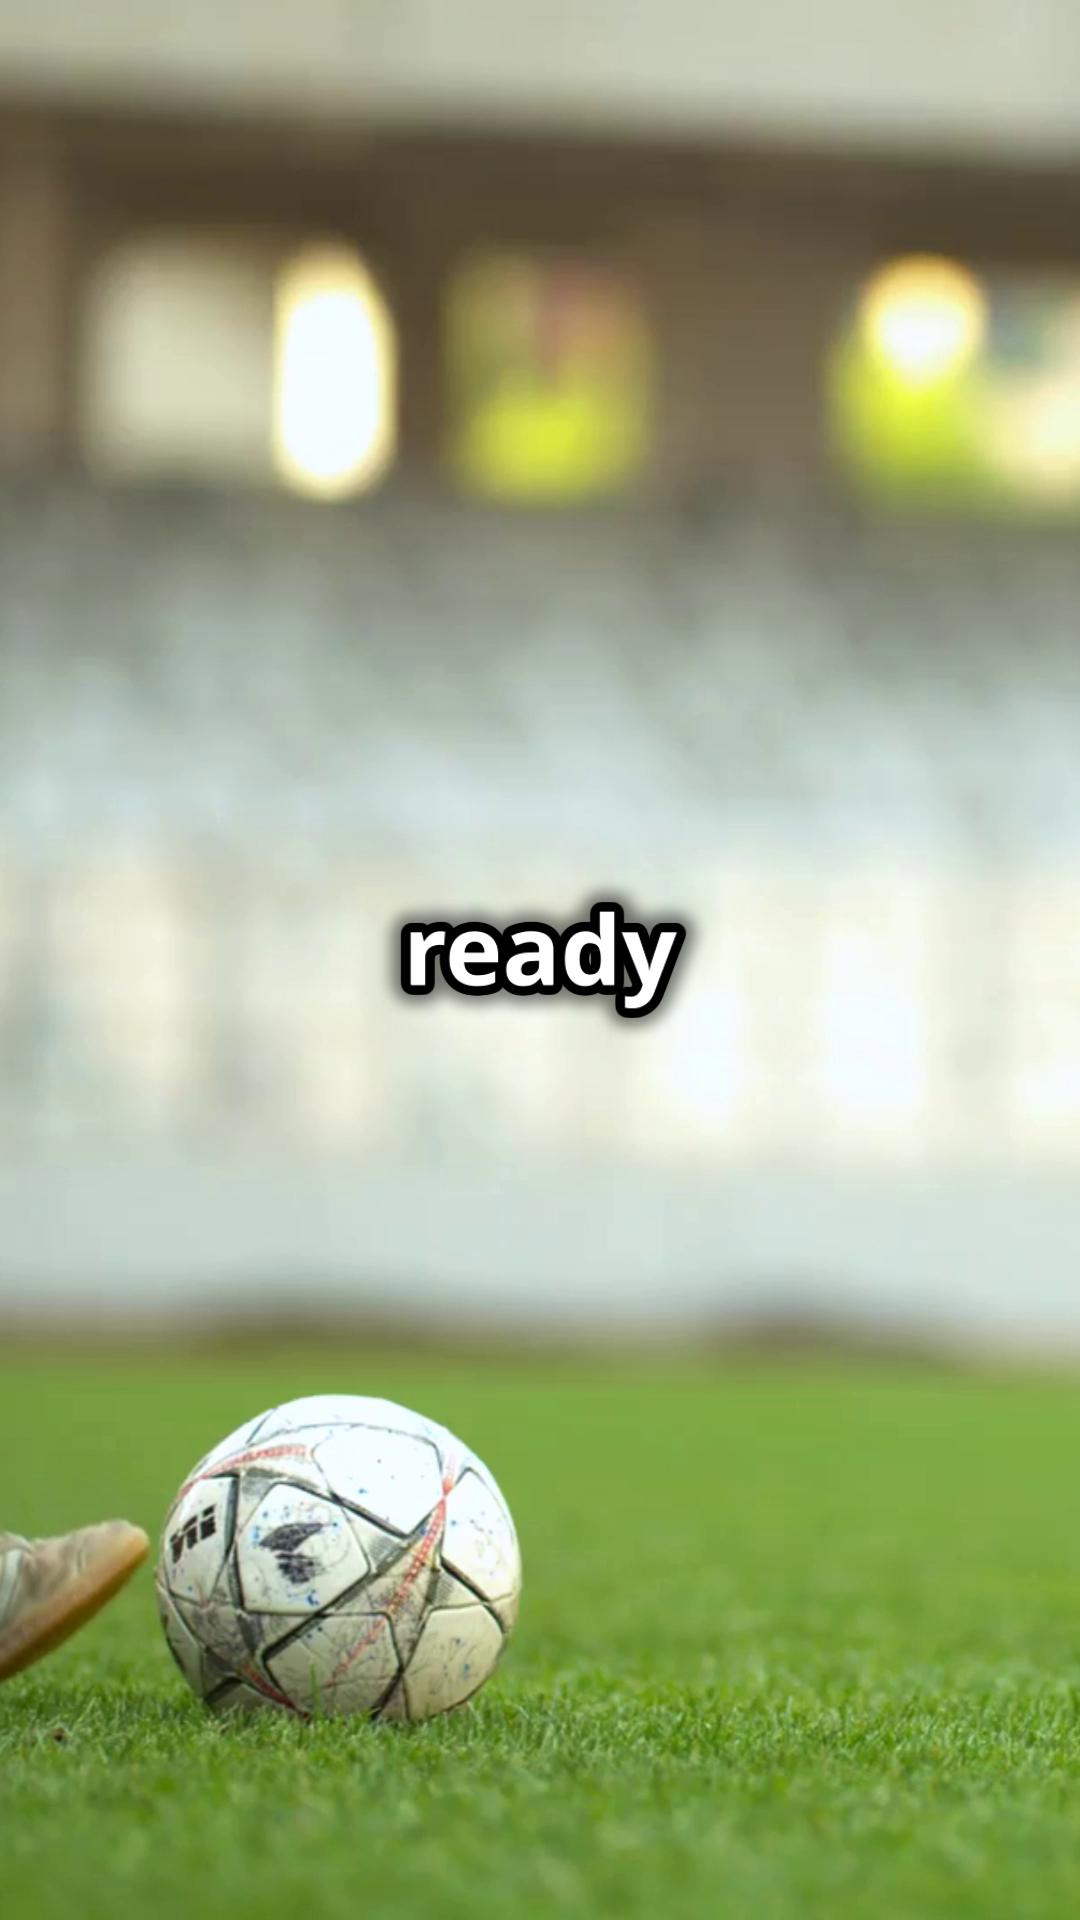

Displaying a frame of video:  football1.mp4
Total number of frames: 159
Frame rate: 30.0
Video duration: 5.30 seconds



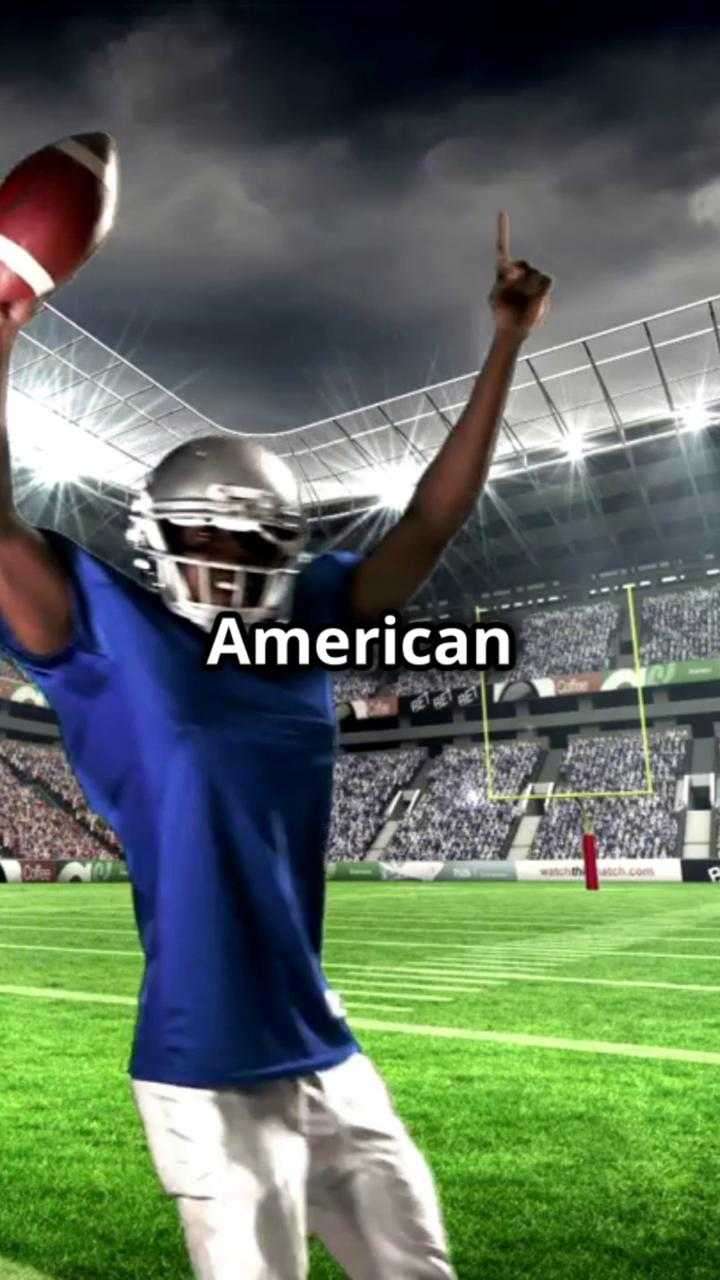

Displaying a frame of video:  football2.mp4
Total number of frames: 165
Frame rate: 30.0
Video duration: 5.50 seconds



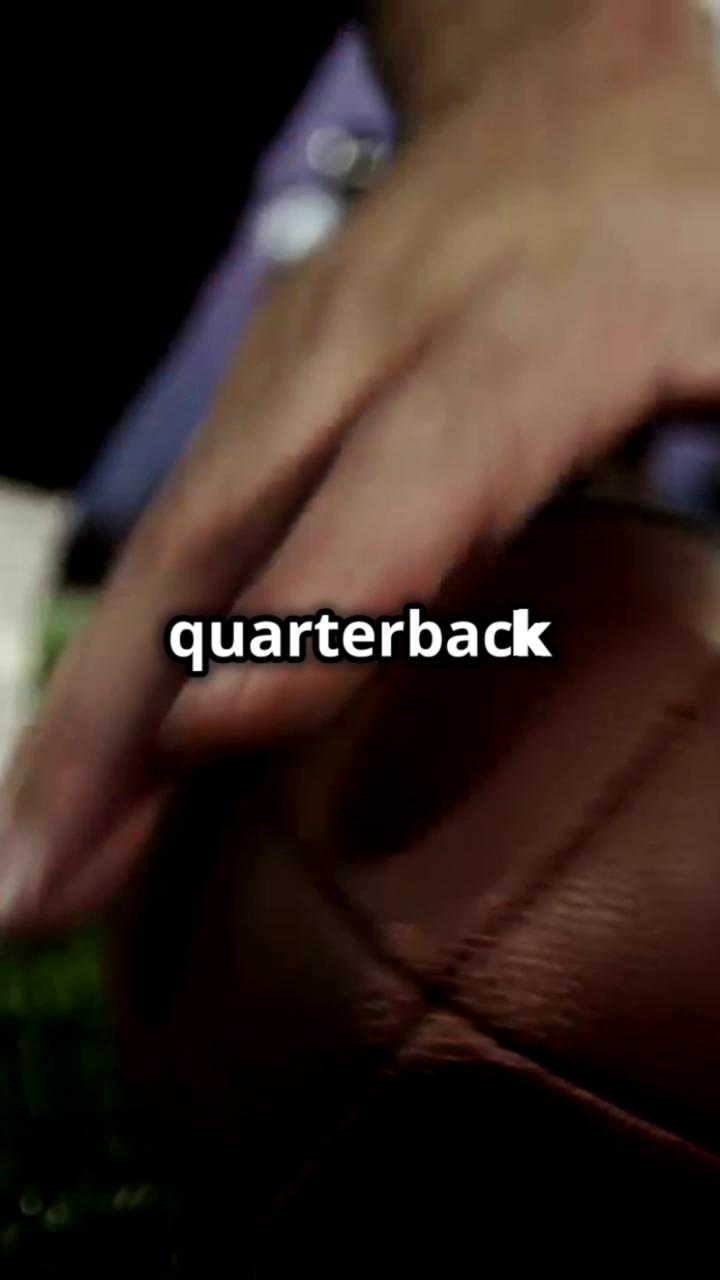

Displaying a frame of video:  hockey1.mp4
Total number of frames: 130
Frame rate: 30.0
Video duration: 4.33 seconds



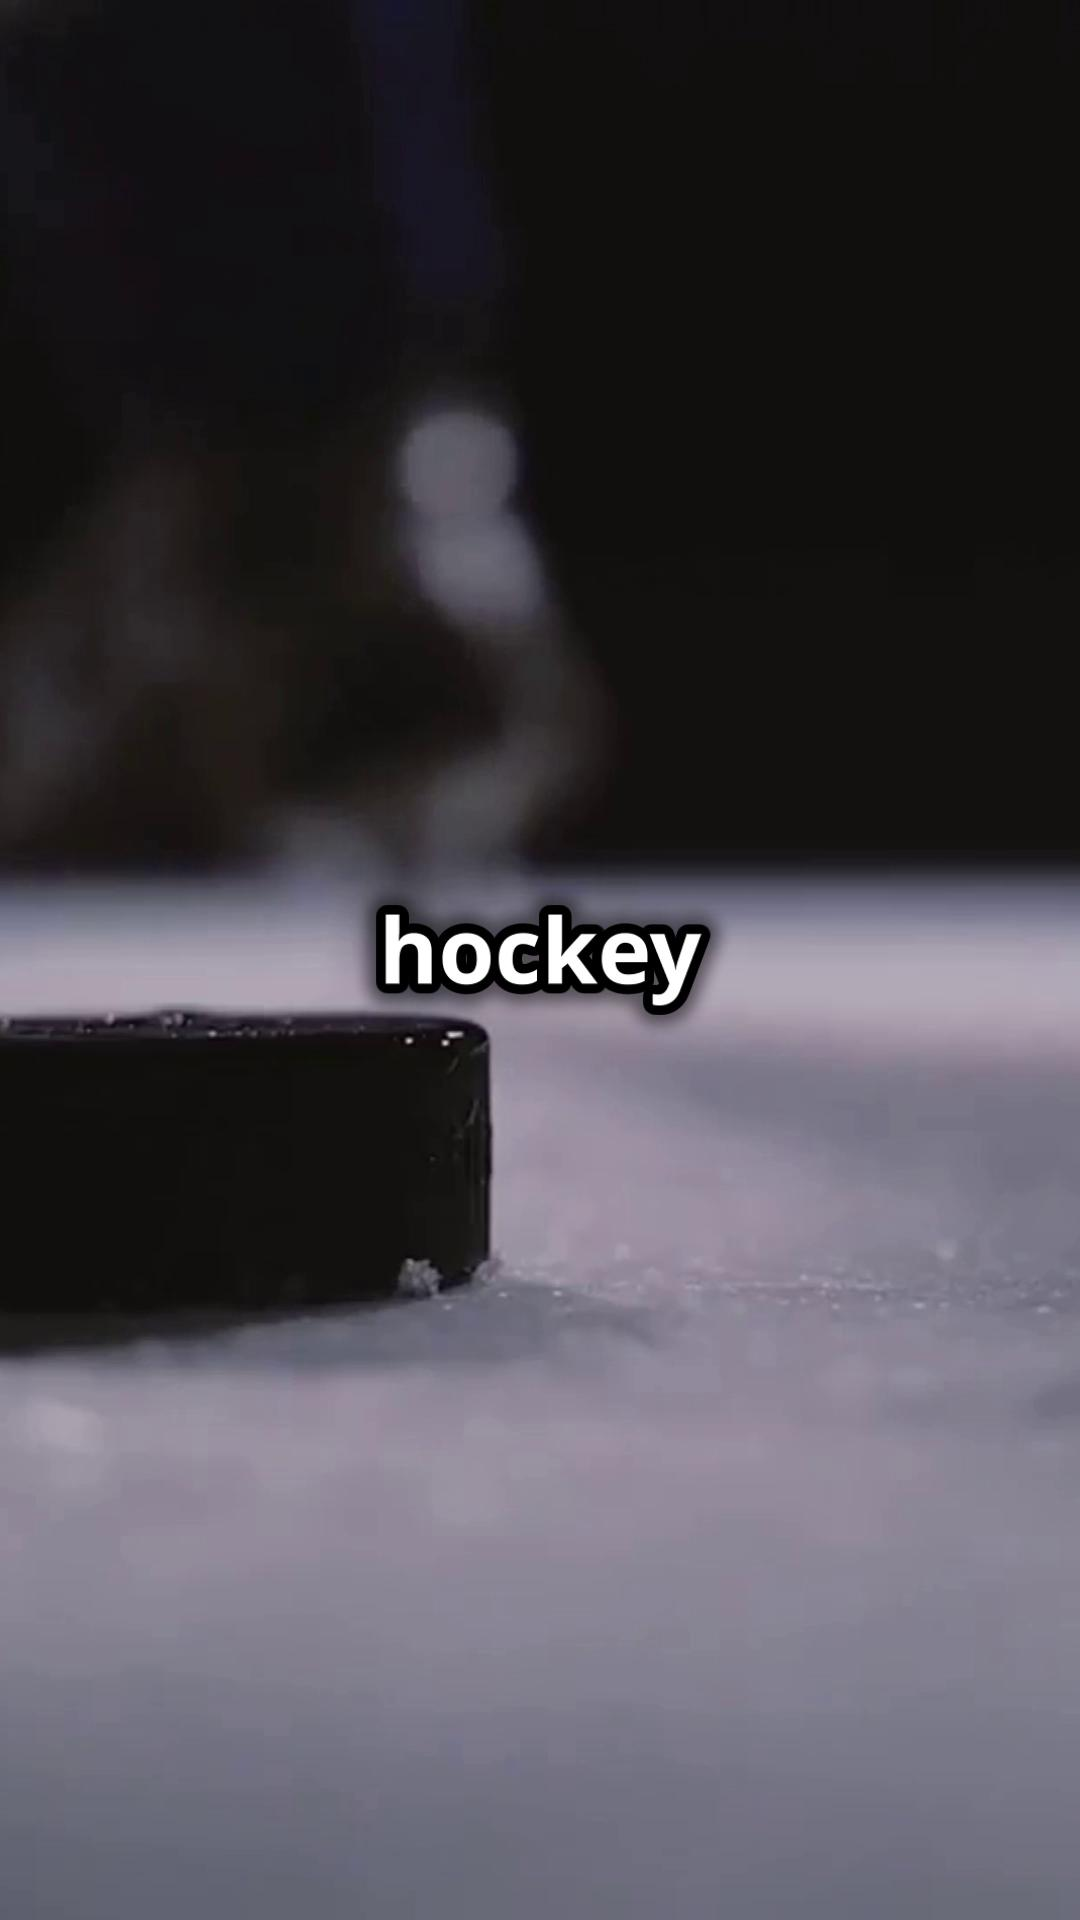

In [ ]:
for i in range(lf):
  file_name = lfiles[i]
  print("Displaying a frame of video: ", file_name)
  video_capture = cv2.VideoCapture(file_name)
  frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
  print(f'Total number of frames: {frame_count}')

  frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
  print(f"Frame rate: {frame_rate}")

  if frame_rate > 0:
    video_duration = frame_count / frame_rate
    print(f"Video duration: {video_duration:.2f} seconds")

  video_capture.release()
  display_video_frame(file_name, frame_number=10, size=(100, 110))